# Final Project - Explainer Notebook - s153845 & s200348

## Table of Contents
- 1) Motivation
- 2 & 3) Basic Stats and Data Analysis
    - 2.1) Basic Stats - COVID19 Impact Analysis
    - 3.1) Data Analysis - COVID19 Impact Analysis

    - 2.2) Basic Stats - Social Media Impact Analysis
    - 3.2) Data Analysis - Social Media Impact Analysis

    - 2.3) Basic Stats - Economy Impact Analysis
    - 3.3) Data Analysis - Economy Impact Analysis

- 4) Genre
- 5) Visualizations
- 6) Discussion
- 7) Contributions

# 1) Motivation

The goal is to give the viewer throughout analysis of the COVID19 impact in US. We have chosen to deep dive into the virus' impact on US since US globally is a very interestring super power. Many other countries therefore tend to be highly effected by the situation in US. 

The analysis is three folded and looks at the impact from three different angles. These three studies are however very much connected and the impact of COVID19 has the tendency to spread like rings in the water across different viewing points. When reading through our website should the viewer hopefully be guided through the complete COVID19 experience in US and how the country ended up following the red curve instead of the green curve and which massive consequenses that emerged simultaneously. 

The three analyses made and the datasets they are based on is: 
- **COVID19 Impact Analysis**
    - Main Dataset: COVID19Data - Data about Confirmed cases, Deaths, Recovered each day for each country. This dataset has been used to analyse the spread of COVID19 is US and provide information of the severity of the COVID19 spread in US compared to other countries.  
        - **SOURCE:https://www.kaggle.com/imdevskp/corona-virus-report**
    - Secondary Dataset: EnrichedCOVID19Data - Data gives detailed demographic information of all countries and has been used to provide features for machine learning model in order to forecast the Number of deaths in the next couple of days. 
        - **SOURCE: https://www.kaggle.com/optimo/covid19-enriched-dataset-week-2**


- **Social Media Impact Analysis**
    - Main Datasets: xx-xx-2020_CoronaVirus_Tweets - Each dataset consist of all COVID19 related tweets on a given day. First dataset is from start march and last dataset is end april. Each day is loaded in a seperate dataset because of it's big size and has then been merged to one massiv twitter dataset. The twitter data is used to analyrize the puplic awareness and and concerns toward COVID19. 
        - **SOURCE: https://www.kaggle.com/smid80/coronavirus-covid19-tweets?fbclid=IwAR2nX4IeiIXqN4jrSY7Dq0nn7EH2FpK6nDHSUYvk6y5uXSSAS7oi0Dz1pmE**
    - Secondary Dataset: WorldCityLocationTable - This dataset has been used to translate citycodes from tweets to latitude and longitude coordinates to be able to map out the COVID19 awareness both locally in US and globally. 
        - **SOURCE:https://github.com/bahar/WorldCityLocations**


- **Economic Impact Analysis**
    - Main Dataset: Yahoo Finance API call through Python Package. Includes all historic data of prices, opening and closing prices, as well as info on the stocks and indexes. Access to all data on Yahoo Finance in real time. All our analysis’ and extracts were done on May 12th. 
        - **SOURCE: https://pypi.org/project/yahoo-finance/**
    - Secondary dataset: Unemployment numbers extracted from Beaureau of Labor Statistics (bls.gov) and their datatools. Includes historical data on a monthly level of US citizens. 
        - **SOURCE: https://www.bls.gov/data/#unemployment**


# Part 2
All three parts have been dividid roughly into basic stats and analysis individually, but they obviously overlap (in the same way that their focus overlaps - time of contamination and lockdown is used in analysis of twitter data, and economic events are used in looking at the impact on twitter). 

# Initial Imports
We have included all the imports and tools used for further programming and analysis together to give an overview of all required packages: 

In [1]:
# Initial Imports
import numpy             as np
import pandas            as pd 
import matplotlib.pyplot as plt
import yfinance          as yf #data for part 3
import plotly.express    as px
import calendar
import math 
import time
import seaborn
import string
import os
import folium

# Importing necessary packages for Bokeh plotting. 
from bokeh.io                   import show, output_notebook, output_file
from bokeh.palettes             import viridis, inferno
from bokeh.plotting             import figure
from bokeh.models.tools         import HoverTool
from bokeh.models               import Span, SingleIntervalTicker, LinearAxis, ColumnDataSource, FactorRange, Legend
from bokeh.models.tickers       import FixedTicker,DaysTicker

#SK Learn
from sklearn.linear_model       import LinearRegression
from sklearn.metrics            import mean_squared_error
from sklearn.metrics            import mean_absolute_error
from sklearn.model_selection    import cross_val_predict
from sklearn.model_selection    import KFold
from sklearn.preprocessing      import StandardScaler
from sklearn.feature_extraction import stop_words

#Concat ranges
from itertools                  import chain

#Folium
from folium                     import plugins
from folium.plugins             import HeatMap

#GIF imports
if not os.path.exists("images"):
    os.mkdir("images")

from IPython.core.display       import display, HTML
%matplotlib inline

# Matplotlib style options
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 4)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# COVID19 Impact Analysis
---------------
## Initialization 

This analysis will focus on the spread of corona virus in the US. The goal with the analysis is to understand the current situation and predict future development in US to gain some knowledge for the US market prices analysis. This analysis will start broad and then narrow down to focus only on US and some selected countries for comparison. 

## 2.1) Basic Stats

The following section is an exploratory data analysis and will look into initial data cleaning and preprocessing and futhermore contain key plots to describe the dataset.

The main dataset is then loaded and the Date column is converted to a datetime object

In [2]:
# Loading COVID19 data into pandas dataframe
df_corona = pd.read_csv('./Data/covid_19_clean_complete.csv')

# Converting the date format from object to datatime
df_corona['Date'] = pd.to_datetime(df_corona['Date'])

First, a general analysis of the corona impact world wide is made. This is done to get an overall view of the 
severity of the corona virus. Below is a plot showing the development of COVID19 from a local chinese virus to a global pandemic. 

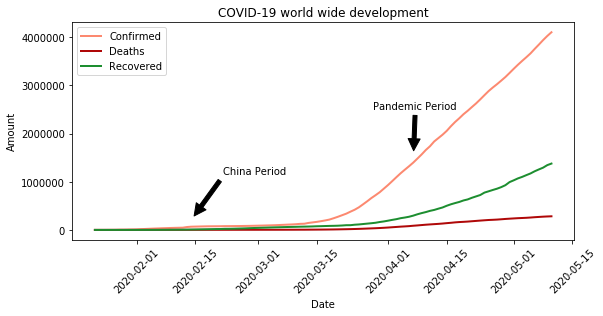

In [3]:
# Constructing a dataframe with the total sum of Confirmed, Deaths and recoved grouped by each date
Time_stats = df_corona[["Confirmed","Deaths","Recovered","Date"]].groupby(["Date"]).sum()

# Plot of COVID-19 Development
plt.figure(figsize=[9,4])
plt.title("COVID-19 world wide development",fontsize=12)
plt.xlabel('Date')
plt.ylabel('Amount')

# Plotting lines
plt.plot(Time_stats.index,Time_stats['Confirmed'],c="#FC8970", linewidth=2)
plt.plot(Time_stats.index,Time_stats['Deaths'],c='#AF0808', linewidth=2)
plt.plot(Time_stats.index,Time_stats['Recovered'],c='#1D8E30', linewidth=2)

plt.xticks(rotation=45)
# Adding text and arrows
plt.annotate('China Period', xy=(0.24, 0.1),xytext=(0.3, 0.3), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))

# Adding text and arrows
plt.annotate('Pandemic Period', xy=(0.68, 0.4),xytext=(0.6, 0.6), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(('Confirmed', 'Deaths', 'Recovered'))
plt.savefig('webpage001.png',bbox_inches = 'tight')
plt.show()

From the plot of the world wide corona development it is seen that the epidemic in China was very little compared to the Pandemic-outbreak starting in March. It is also seen that the outbreak most likely follows a sigmoid distribution with an exponential growth at the beginning before expectingly gradually slowing down. 

Since the number of confirmed cases looks to be growing exponentially a chart with a logarithmic y-axis is also made to give a better comparison of the relationship between confirmed cases, deaths and recoveries.

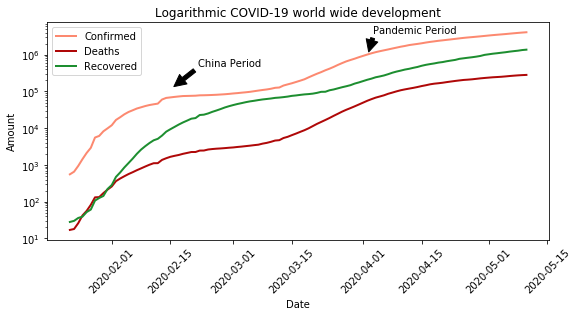

In [4]:
# Log transformation of y axis. 
plt.figure(figsize=[9,4])
plt.title("Logarithmic COVID-19 world wide development",fontsize=12)
plt.xlabel('Date')
plt.ylabel('Amount')

# Plotting lines
plt.plot(Time_stats.index,Time_stats['Confirmed'],c="#FC8970", linewidth=2)
plt.plot(Time_stats.index,Time_stats['Deaths'],c='#AF0808', linewidth=2)
plt.plot(Time_stats.index,Time_stats['Recovered'],c='#1D8E30', linewidth=2)
plt.xticks(rotation=45)
# Adding text and arrows
plt.annotate('China Period', xy=(0.25, 0.7),xytext=(0.3, 0.8), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))

# Adding text and arrows
plt.annotate('Pandemic Period', xy=(0.64 , 0.86),xytext=(0.65, 0.95), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(('Confirmed', 'Deaths', 'Recovered'))
plt.yscale("log")
plt.savefig('webpage002.png',bbox_inches = 'tight')
plt.show()

The logarithmic plot shows a more or less stable relationship between the number of deaths and the number of cases, and thereby a stable mortality rate. The mortality rate is the percentage of death per confimed cases. 

In order to take a more detailed look of the behaivior of the mortality rate is the mortality rate plotted below. 

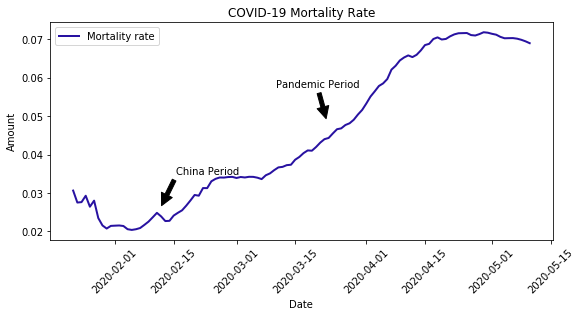

In [5]:
# Plotting mortality rate gived by relationship bewteen deaths and confirmed. 
plt.figure(figsize=[9,4])
plt.title("COVID-19 Mortality Rate",fontsize=12)
plt.xlabel('Date')
plt.ylabel('Amount')

# Plotting line
plt.plot(Time_stats.index,(Time_stats['Deaths']/Time_stats['Confirmed']),c="#2812A1", linewidth=2)
plt.xticks(rotation=45)

# Adding text and arrows
plt.annotate('China Period', xy=(0.22, 0.15),xytext=(0.25, 0.3), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))

# Adding text and arrows
plt.annotate('Pandemic Period', xy=(0.55, 0.55),xytext=(0.45, 0.7), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(('Mortality rate',))
plt.savefig('webpage003.png',bbox_inches = 'tight')
plt.show()

This plot shows som very interesting results. The mortality rate was between 2%-3% during the outbreak in China, but since the pandemic outbreak has started  the mortality rate increased a lot and has in start may reached a level above 7%. What has caused this sudden increase in the mortality rate? Below is some possible scenarios. 

**1)** Virus has become more agressive/dangourous - Nothing indicates that this has happened. 

**2)** Health care collaps is causing increase - Health care overload is sure causing many deaths, but the health care in China also collapsed, so it doesn't explain the sudden increase

**3)** Countries are overwhelmed by the virus and dont have equipment or resources to test agressevily enough which causes a huge dark number of people who are actually infected but doesn't count in the statistics.

The third theory seems by far to be the most likely expacially with the knowlegde from WHO that only 20 % of infected get severe sympthoms. This also means that we cannot trust the number of confirmed cases blindly if we want to avoid flawed results.

### Heatmaps
Heatmaps is a powerfull visulization tool when doing exploratory data analysis. Below heatmaps have been used to give a nice overview of the world situation at the moment while at the same time giving the viewer the possiblity to easy and quickly compare two or several countries of interest. 

The first heatmap looks at the number of deaths in each country. The number of deaths has been chosen as the measure since it is assumed to be a lot more precise than the number of confirmed cases.

To visualize the heatmaps is a new dataframe (Date_Country_stats) defined. This dataframe looks at the summurized COVID19 stats per day per country. Prior to the heatmap plots is some preprocessing of the new dataframe. A mortality rate column is added and a Logarithmic transformation column of the deaths is also added to improve visualizations of exponential data. Futhermore yet another dataframe is defined which only contains the latest values for each country. 

In [6]:
# Preparing dataframe used to make heatmaps
# Grouping by date and country to get Confirmed and Deaths for the whole country inclusive regions
Date_Country_stats = df_corona[["Confirmed","Deaths","Recovered","Date","Country/Region"]].groupby(["Date","Country/Region"]).sum()

# Adding mortality rate column to the dataframe
Date_Country_stats['Mortalityrate'] = Date_Country_stats['Deaths']/Date_Country_stats['Confirmed']

# Adding logarithmic death count column to the dataframe
Date_Country_stats['LogDeaths'] = np.log(Date_Country_stats['Deaths']+1)

# Defining newest date
target_date = max(Date_Country_stats.index.get_level_values(0))

# Selecting the newest date only
Newest_Date_Country_stats = Date_Country_stats[Date_Country_stats.index.get_level_values(0) == target_date]

In [7]:
# Plotting death count heatmap for the newest date
fig = px.choropleth(Newest_Date_Country_stats, locations=Newest_Date_Country_stats.index.get_level_values(1), 
                    locationmode='country names', color="LogDeaths", 
                    hover_name=Newest_Date_Country_stats.index.get_level_values(1),
                    hover_data=["Confirmed", 'Deaths'],range_color=[0, max(Newest_Date_Country_stats["LogDeaths"])], 
                    color_continuous_scale='reds',width=800, height=400)
fig.write_html("webpage004.html")
fig.show()

Back up screenshot: 

<img src="https://raw.githubusercontent.com/rasmusbrottwitt/coronavirus/master/Charts/screen1.png?token=APC5BG5EHWYLCRTRTK2MG4C6YUJJA" width="800" align=left> <br><br><br><br><br><br><br><br><br><br><br>

The world map shows that US and Europe both are in some critical situations with many deaths. Africa is on the other hand doing good for now.

The above heatmap gives a good look at how critical the situation is up until now. But in order to estimate where the situation might have the potiential to be critical in the future the mortality rate in the different countries is plotted. This will indicate both if a collaps of the health care system in the country is happening and causing high mortality rates or if the country is not prepared for massive testing, which also can cause high mortality rate in statistics. 

In [8]:
# Plotting Mortality rate
fig = px.choropleth(Newest_Date_Country_stats, locations=Newest_Date_Country_stats.index.get_level_values(1), 
                    locationmode='country names', color="Mortalityrate", 
                    hover_name=Newest_Date_Country_stats.index.get_level_values(1),
                    hover_data=["Confirmed", 'Mortalityrate'],range_color=[0, 0.25], 
                    color_continuous_scale=[[0, 'rgb(245,245,255)'], [1, 'rgb(0,0,255)']],
                    width=800, height=400)
fig.write_html("webpage005.html")
fig.show()

Back up screenshot: 

<img src="https://raw.githubusercontent.com/rasmusbrottwitt/coronavirus/master/Charts/screen2.png?token=APC5BG7TBGA5HHVKMOCAV2C6YUJRO" width="800" align=left> <br><br><br><br><br><br><br><br><br><br><br>

The mortality rate world map shows really high mortality rate in Africa. However when hovering over the chart most African countries still has very low amount of deaths. Therefore is it assumed that the high mortality rate in Africa is due to lack of testing opportunities. 


Both heapmaps above show the current situation. To show how and at what pace the whole corona situation unfolded is a gif with number of deaths over time made and shown in the website. From the gif can it be seen that all non asian countries actually had a lot of time to react while the virus was kept mainly in China. 

Below is the method used to make the gif: 

In [9]:
##install this
##conda install -c plotly plotly-orca==1.2.1 psutil requests
## Running a loop of the choropleth plot to get a plot for each day. 
indx = 1
for d in Date_Country_stats.index.get_level_values(0).unique(): 
#    
    temp = Date_Country_stats[Date_Country_stats.index.get_level_values(0) == d]
    fig = px.choropleth(temp, locations=Newest_Date_Country_stats.index.get_level_values(1), 
                    locationmode='country names', color="LogDeaths", 
                    hover_name=Newest_Date_Country_stats.index.get_level_values(1),
                    hover_data=["Confirmed", 'Deaths'],range_color=[0, max(Newest_Date_Country_stats["LogDeaths"])], 
                   color_continuous_scale='reds',
                    title='Date: ' + str(d)[:10])
    fig.write_image(str(indx) + ".png")
    indx=indx+1

In [10]:
import imageio
images = []
files = os.listdir('./images')
## Saving the gif
for filename in range(1,len(files)):
    if filename != '.ipynb_checkpoints':
        images.append(imageio.imread('./images/' + str(filename)+ '.png'))
kargs = { 'duration': 0.1 }
imageio.mimsave('Corona_world_map.gif', images, 'GIF', **kargs )

The final part of the basic stat analysis of the COVID19 will look at each country. The goal of the following is to compare the countries with each other and thereby find countries of interest for futher comparison with US.

A new dataframe (Country_Time_stats) is now made to be able to analyse the daily development in each country. 

In [11]:
# Dataframe used for analysis is constructed. 
Country_Time_stats = df_corona[["Confirmed","Deaths","Recovered","Date","Country/Region"]].groupby(["Country/Region","Date"]).sum()

# Country column made based on first part of index
Country_Time_stats['Country'] = Country_Time_stats.index.get_level_values(0)

# Date column made based on second part of index
Country_Time_stats['Date'] = Country_Time_stats.index.get_level_values(1)

Below is the number of confirmed cases, deaths and recoveries shown. Starting at january 22 until mid april.  
The same sigmoid distribution starting with an expenential growth can more or less be seen is the case for every country. China has clearly manage to bend the curve completely but other countries like Iceland and South Korea are also doing good.

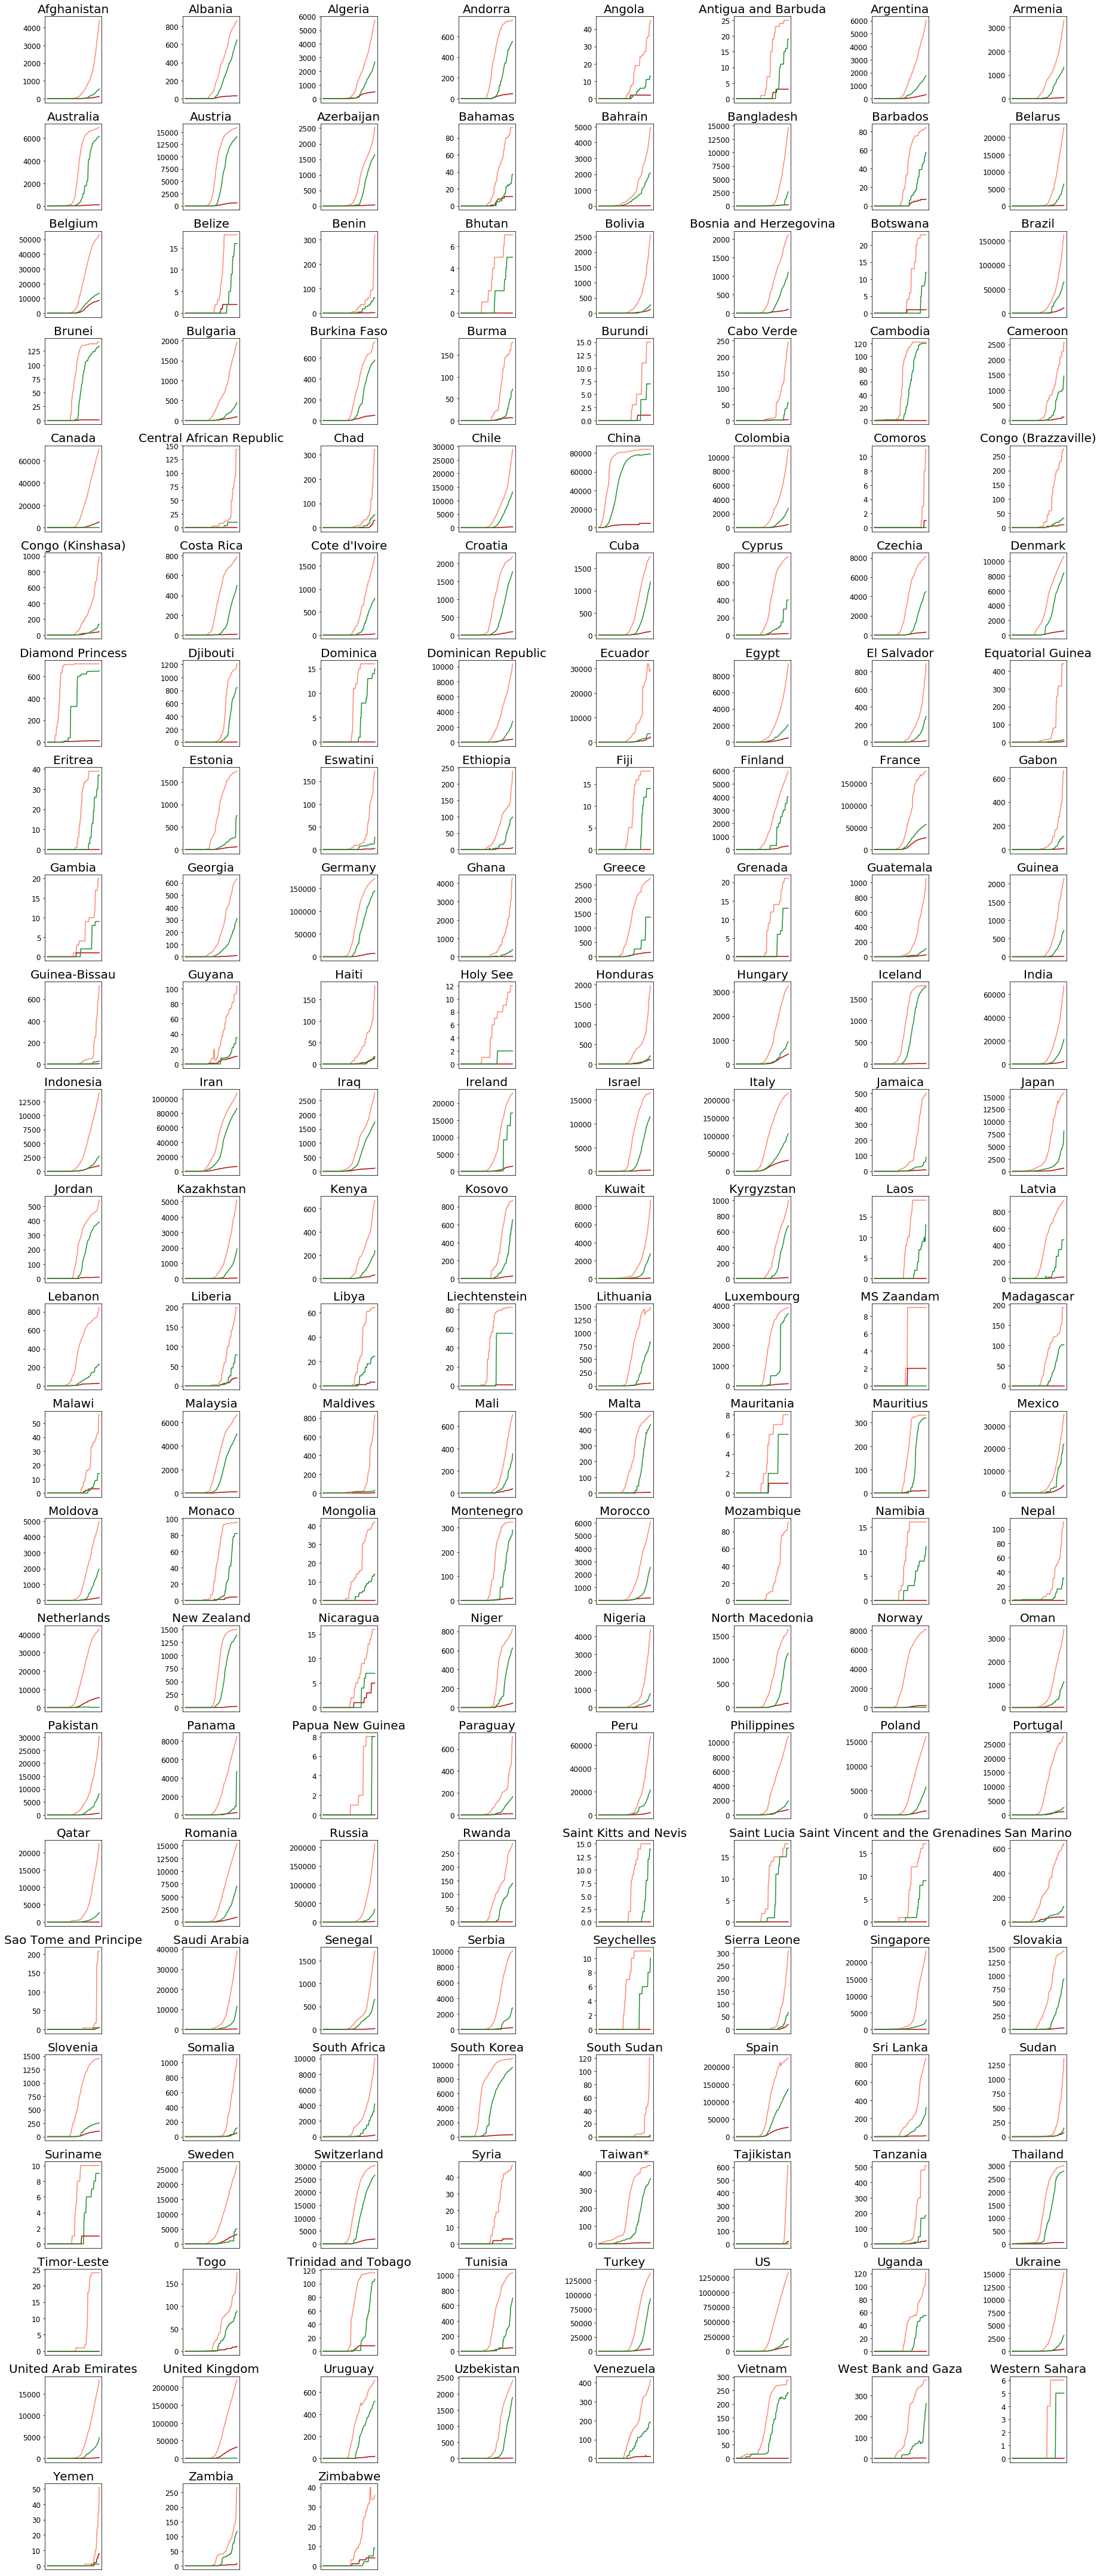

In [12]:
# Plotting COVID19 development for all countries. 
plt.figure(figsize=(25,60))
for i, elem in enumerate(Country_Time_stats['Country'].unique()):
    plt.subplot(24,8,i+1)
    plt.title(elem, fontsize = 20)
    temp_df = Country_Time_stats[Country_Time_stats.Country.isin([elem])]
    
    #Plotting lines
    plt.plot(temp_df['Date'],temp_df['Confirmed'],c="#FC8970")
    plt.plot(temp_df['Date'],temp_df['Deaths'],c='#AF0808')
    plt.plot(temp_df['Date'],temp_df['Recovered'],c='#1D8E30')
    
    plt.yticks(fontsize = 12)
    plt.xticks([])
    plt.xlabel('')
plt.tight_layout()
plt.show()

NEXT: a bar chart of the countrywise mortality rate (that also were shown in the above heatmap) shown. This time is countries with less than 500 confirmes cases removed in order to remove to much data uncertaintency. The point with this plot is to go from the very wide heatmap investigation to a narrow investigation of the most affected countries.
Futher data processing is done to obtain the dataframe necessary to provide the following bar charts. 

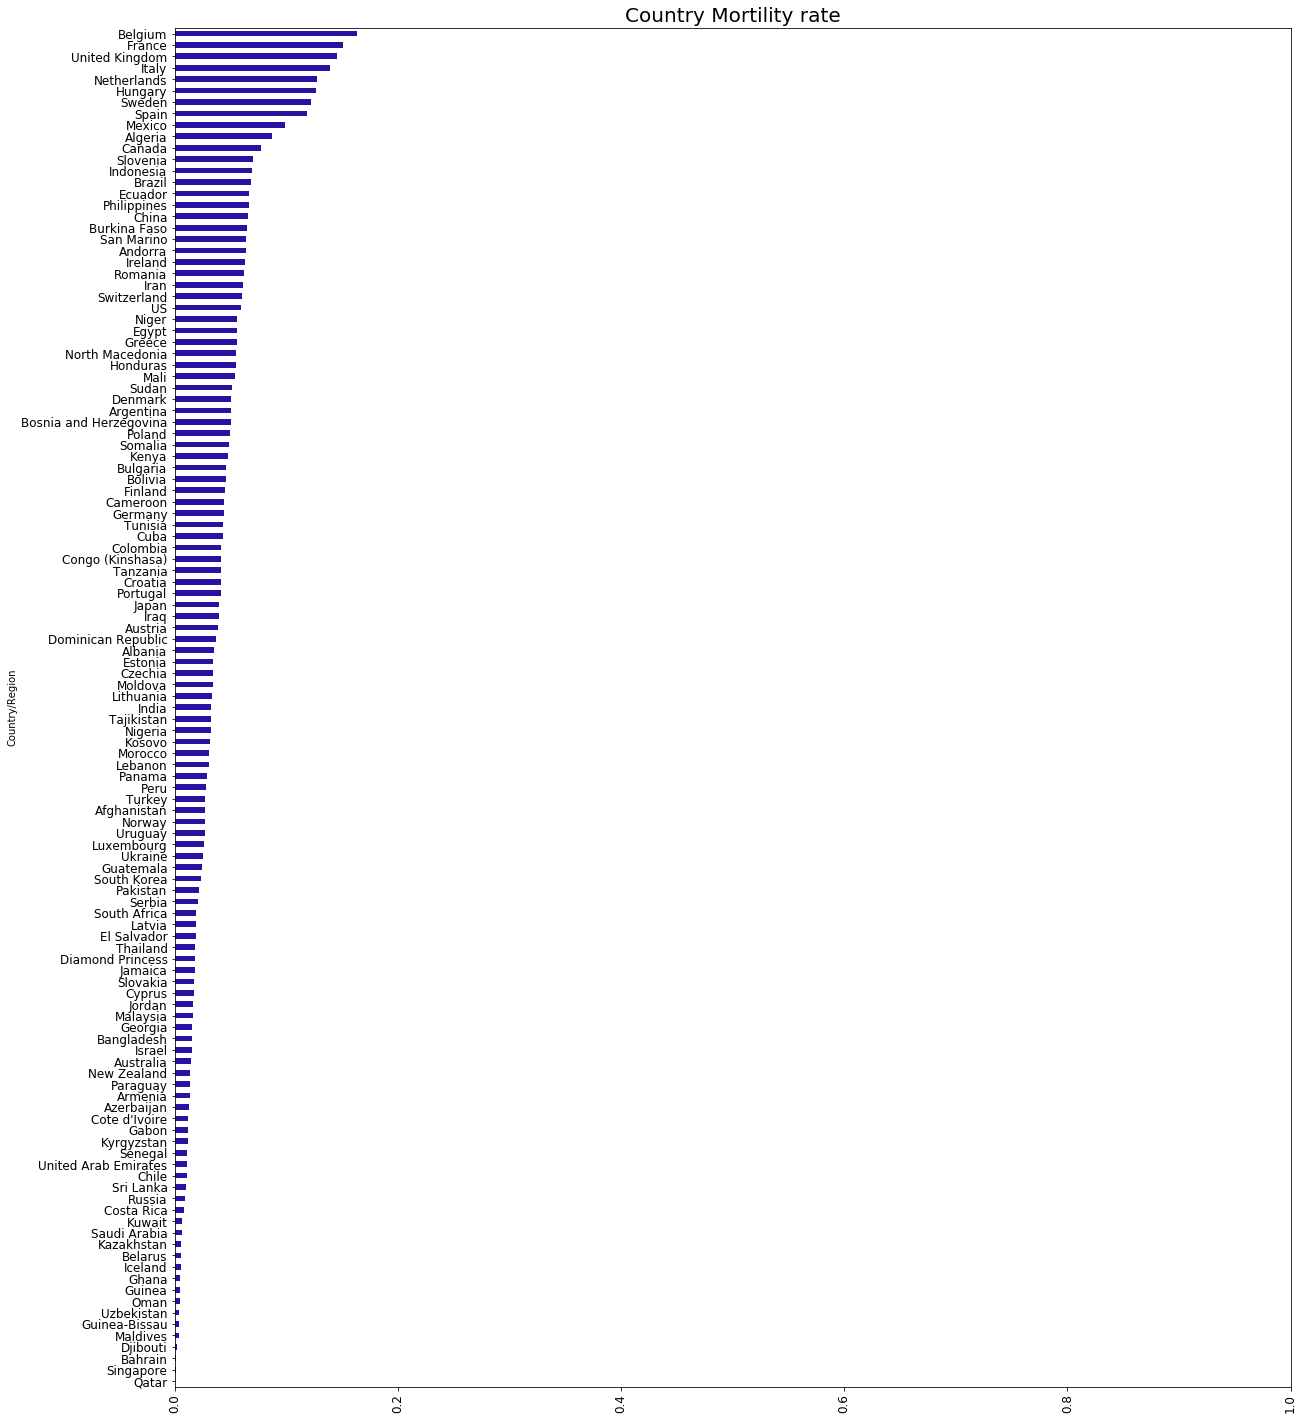

In [13]:
# Looking at mortatility rate per country. 
Country_stats = df_corona[["Confirmed","Deaths","Recovered","Country/Region"]].groupby(["Country/Region"]).max()

# Filtering out all countries with less than 500 cases to remove high data uncertaintency
Country_stats2 = Country_stats[Country_stats["Confirmed"]>=500]

# Adding mortality rate to dataframe
Country_stats2['Mortalityrate'] = Country_stats2['Deaths']/Country_stats2['Confirmed']

# Sorting 
Country_stats2 = Country_stats2.sort_values(by=['Mortalityrate'], ascending=False)

# Plotting the mortality rate per country wtih more than 499 confirmed cases.
plt.figure(figsize=[20,25])
plt.title('Country Mortility rate', fontsize = 20)

Country_stats2['Mortalityrate'].sort_values(ascending=True).plot(kind="barh",color="#2812A1") 

plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12, rotation = 90)
plt.xlim([0,1])
plt.show()

From the bar chart it is obvious that many of the African countries that caught attention in the heatmap are removed since the number of confirmed cases is below the minimum of 500. We also see that the europiaen countryes have a very high mortality rate. It is however still assumed that this is due to lack of testing. US has a lower mortality rate than many countries eventhough they have a huge number of deaths. This tells ud that they certainly  have not given up on testing and fighting the virus, which also makes the county interstring to investigate.  

Below is a chart of the casualty count per country. As the heatmap also showed it is US and Europe that tops this list. Only countries with above 100 deaths can be seen in the chart. 

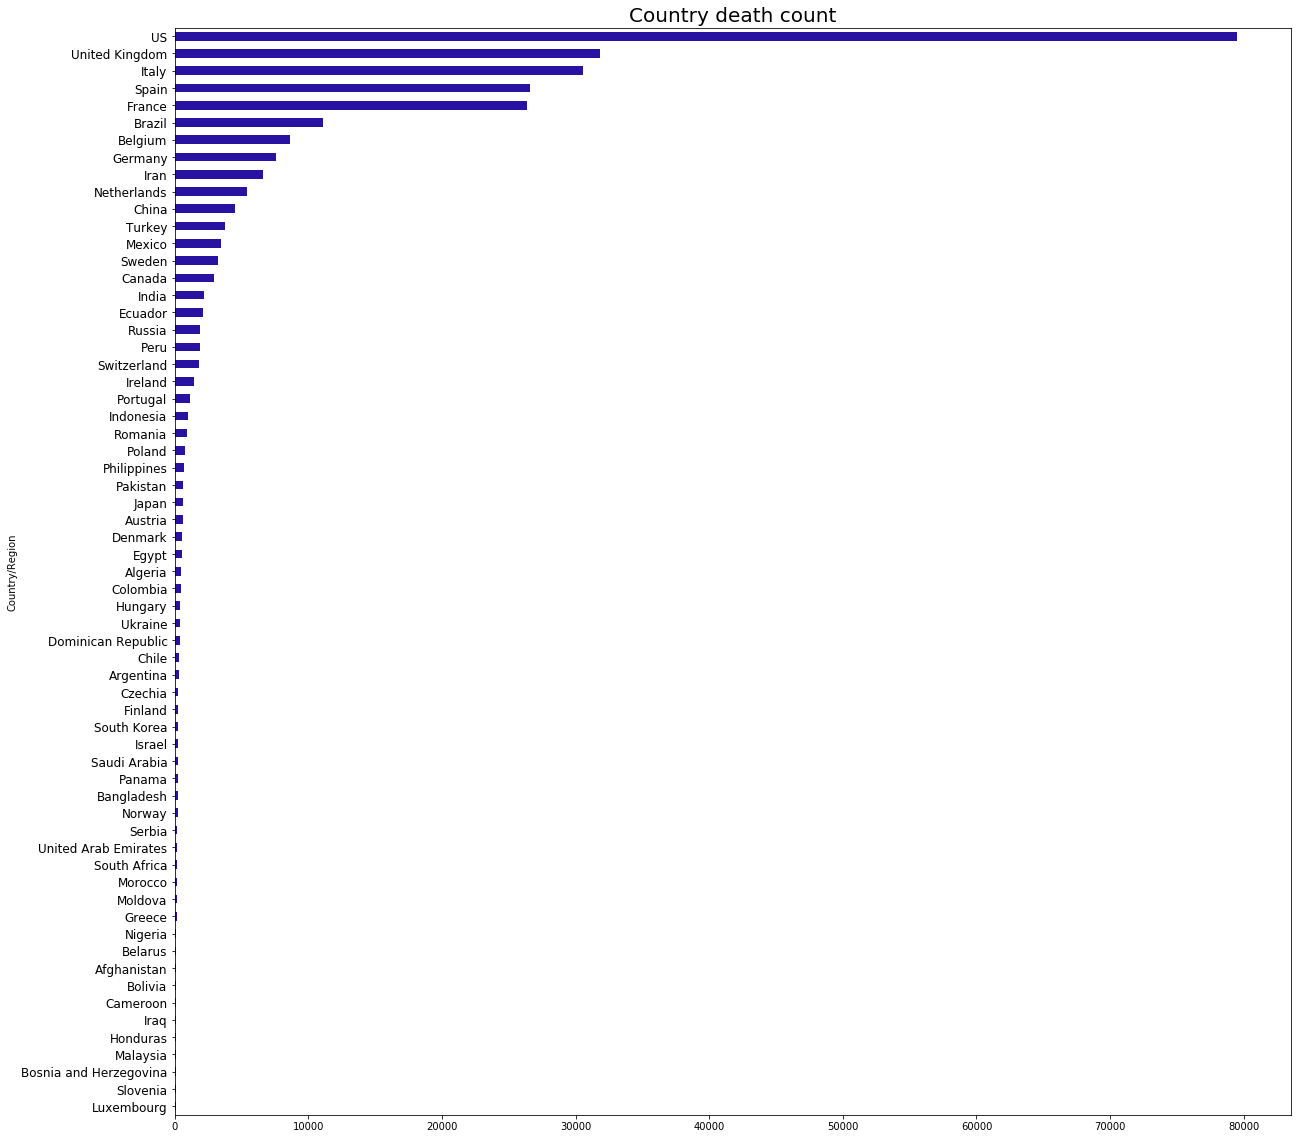

In [14]:
# Death count per country
plt.figure(figsize=[20,20])
plt.title('Country death count', fontsize = 20)
temp = Country_stats[Country_stats['Deaths']>100]
temp['Deaths'].sort_values(ascending=True).plot(kind="barh",color="#2812A1") 
plt.yticks(fontsize = 12)
plt.show()

**Key points from exploratory data analysis:** The COVID19 virus definitely took many unprepared countries by surprice very fast. Almost the same development story with a suddenly exploding increase in number of confirmed cases can be shown for all counties. It is however also clear that the impact is very different from country to country and countries such as Denmark which acted very fast to the thread has succeded in following the green curve while countries like US, Italy that weren't as fast with applying necessary actions have followed the red curve. 

Based on measured data the mortality rate is steadily increasing. It is however likely that this is flawed and the real mortality rate is more or less steady through the whole pandemic. When looking at the global development plot of COVID19 it is almost unreal to see how little impalct the time when the disease was only an epidemy in China have had compared to the pandemic period. This could be one of the causes behind unprepared countries.

------------
## 3.1) Data Analysis

From the analysis above a few countries have been chosen for futher analysis and forecasting. The countries have been chosen based on number of deaths but also based on other factors which made these countries stand out either based on the COVID19 situation or similarity to USA. 

In [15]:
# Focused Countries
FocusCountries = ['US', 'Italy', 'United Kingdom', 'China','Canada', 'Denmark']

Three interactive bokeh chart will be made to be able to compare the countries and obtain more detailed information on how the virus has impacted the different countries. To be able to visualize the Bokeh charts is the data preprocessed prioer to each chart. First of all is a new dataframe made that only consist of the relevant countries. 

**The three interactive charts are:**

1) Country wise timeline of COVID-19 casualties

2) Logarithmic country wise timeline of COVID-19 casualties

3) Country wise timeline of COVID-19 growth rate

### Country wise timeline of COVID-19 casualties

This chart look at the overall death toll in each of the focused countries since the outbreak stated to be tracked in China at january 22.

In [16]:
# Preparing for dataframe bohek chart.
Focus_Country_Time_stats = Country_Time_stats[Country_Time_stats['Country'].isin(FocusCountries)]

# Extracting date for first bokeh plot
Bohek1 = Focus_Country_Time_stats['Deaths'].unstack().T

# Reseting index
Bohek1 = Bohek1.reset_index()

# Making data into pandas dataframe
Bohek1 = pd.DataFrame(data=Bohek1)

# Deleting unnecessary column
del Bohek1['Date']

# Reseting index
Bohek1 = Bohek1.reset_index()

In [17]:
 #Loading Bokeh enviroment
output_notebook()

Loading BokehJS ...

The intercative bokeh plot is then made. Many configurations can be implemented the the plot. The below code contains comments for made configurations.

In [18]:
# Importing dataframe as bokeh source
source = ColumnDataSource(Bohek1)

# Defining x axis list
date = df_corona['Date'].dt.date.unique().tolist()
date = [ str(x) for x in date ]

# Defining hover configurations
TOOLTIPS = [
    ("Day", "$index"),
    ("Country", "$name"),
    ("Deaths", "@$name"),
]

# Defining figure
p = figure(x_range = FactorRange(factors=date), plot_height=400, plot_width = 800, title="Country wise timeline of COVID-19 casualties",
           x_axis_label = 'date',y_axis_label = 'Death toll',toolbar_location=None,tooltips=TOOLTIPS,x_axis_type=None)

# Loop to fill figure with information from dataframe
line = {}
items = []
coloring = viridis(len(FocusCountries)) # making list of different colors

# Render glyph
for indx,i in enumerate(FocusCountries):
    line[i] = p.line(x='index',  y=i, source=source,line_width=2, muted_alpha=0.3,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))
    
# Vertical line
vline = Span(location=60.5, dimension='height', line_color=coloring[0], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])

# Vertical line
vline = Span(location=61.5, dimension='height', line_color=coloring[2], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])

# Vertical line
vline = Span(location=53.5, dimension='height', line_color=coloring[4], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])

# Vertical line
vline = Span(location=48.5, dimension='height', line_color=coloring[5], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])

# Vertical line
vline = Span(location=46.5, dimension='height', line_color=coloring[1], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])
    
# Adding legends
legend1 = Legend(items=items[0:6],click_policy='mute')
legend1.location = "top_left"
p.add_layout(legend1)

ticker = SingleIntervalTicker(interval=5, num_minor_ticks=10)
xaxis = LinearAxis(ticker=ticker)
p.add_layout(xaxis, 'below')

output_file('webpage006.html')
show(p)

Back up screenshot: 

<img src="https://raw.githubusercontent.com/rasmusbrottwitt/coronavirus/master/Charts/screen3.png?token=APC5BG43TTJVXMEXPA7HQ726YUJ44" width="800" align=left> <br><br><br><br><br><br><br><br><br><br><br>

We see how the virus deaths exploded suddenly in US and that US clearly is on the red curve. In comparison is countries as canada currently staying at the green curve. The dashed vertical lines indicates the lockdown date for each country. We see a huge different between Denmark and Canada that makes national lockdown before any deaths has arise, and clearly are on the green curve, compared to US, UK, and Italy which all made national lochdown pretty late when above 300 deaths had happened and clearly are on the red curve. One could ask why US, UK, Italy waited with the lockdown, did they not take it serously? where they afraid of the economic consequense? We will probably never know the thuth but when the countries starts to open again will it de very interestring to compare the lockdown lenght! maybe a fast lockdown decision means a shorter total lockdown period.  

### Logarithmic country wise timeline of COVID-19 casualties

This chart is looking into how the number of deaths in each of the focus countries has increased since the first death in the given country happend. 

To show this is a counter of days since the first deaths in each country added to the dataframe

In [19]:
# Making double loop to count days since outbreak got to 1 confirmed people in country
# Empty string
day_count = []

# Outer counter
indx2 = 0

# Loop over focus countries
for i in Focus_Country_Time_stats['Country'].unique():
    
    # Inner counter
    indx1 = 1
    
    # Loop over dates
    for d in range(0,len(Focus_Country_Time_stats['Date'].unique())):
        
        # If statement to only count when confirmed people hits 1 
        if Focus_Country_Time_stats.iloc[d+indx2,1] < 1: 
            day_count.append(0)
        else:
            day_count.append(indx1)
            indx1=indx1+1
            
    indx2=indx2+len(Focus_Country_Time_stats['Date'].unique())

# Adding the Dataframe
Focus_Country_Time_stats['DaysSinceOutbreak'] = day_count

In [20]:
# Preparing dataframe for Bokeh chart.
# Grouping by days since outbreak
Bohek2 = Focus_Country_Time_stats[["Deaths","DaysSinceOutbreak",'Country']].groupby(['Country',"DaysSinceOutbreak"]).sum()
Bohek2 = Bohek2.unstack().T

# Reseting index
Bohek2 = Bohek2.reset_index()

# Filtering
Bohek2 = pd.DataFrame(data=Bohek2)

# Printing
del Bohek2['DaysSinceOutbreak']
del Bohek2['level_0']

# Reseting index
Bohek2 = Bohek2.reset_index()

In [21]:
# Importing dataframe the a bokeh source
source2 = ColumnDataSource(Bohek2)

# Defining x ticks
days = source2.data['index'].tolist()
days = [ str(x) for x in days ]

#defining hover configuration
TOOLTIPS = [
    ("Day", "$index"),
    ("Country", "$name"),
    ("Deaths", "@$name"),
]
# Defining figure
p = figure(x_range = FactorRange(factors=days), plot_height=400, plot_width = 800, title="Logarithmic Country wise timeline of COVID-19 casualties",
           x_axis_label = 'Days since first death in country',y_axis_label = 'Death toll',toolbar_location=None,y_axis_type="log",tooltips=TOOLTIPS,x_axis_type=None)

# Loop to add information from source
line = {}
items = []
coloring = viridis(len(FocusCountries)) # making list of different colors


#Render glyph
for indx,i in enumerate(FocusCountries):
    line[i] = p.line(x='index',  y=i, source=source2,line_width=2, muted_alpha=0.3,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))
    
# Vertical line
vline = Span(location=24.5, dimension='height', line_color=coloring[0], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])

# Vertical line
vline = Span(location=19.5, dimension='height', line_color=coloring[2], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])

# Vertical line
vline = Span(location=17.5, dimension='height', line_color=coloring[1], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])

# Adding legends
legend1 = Legend(items=items[0:6],click_policy='mute')
legend1.location = "bottom_right"
p.add_layout(legend1)

ticker = SingleIntervalTicker(interval=5, num_minor_ticks=10)
xaxis = LinearAxis(ticker=ticker)
p.add_layout(xaxis, 'below')

output_file('webpage007.html')
show(p)

Back up screenshot: 

<img src="https://raw.githubusercontent.com/rasmusbrottwitt/coronavirus/master/Charts/screen4.png?token=APC5BG35O4GGYCBUEOBTIB26YUJ5K" width="800" align=left> <br><br><br><br><br><br><br><br><br><br><br>

This plot maybe gives the answer to why to situation exploded in the US. They waited 24 days from first confirmed death to lock down the country! That is about a week more of uncontroled spread than UK and Italy who had lockdown at the aproximately same time since first death. When looking at UK and Italy it is also seen that the curve is almost identical. Denmark and Canada made lockdown before first death and the lockdown can therefore not be seen on the chart.

### Country wise timeline of COVID-19 growth rate

In order the plot the growth rate it is necessary to do some preprocessing of the dataframe both days since outbreak in country and growth rate column is added to the dataframe

In [22]:
# Making double loop to count days since outbreak got to 1 confirmed people in country

# Empty string
day_count = []

# Outer counter
indx2 = 0

# Loop over focus countries
for i in Country_Time_stats['Country'].unique():
    
    # Inner counter
    indx1 = 1
    
    # Loop over dates
    for d in range(0,len(Country_Time_stats['Date'].unique())):
        
        # If statement to only count when confirmed people hits 1 
        if Country_Time_stats.iloc[d+indx2,1] < 1: 
            day_count.append(0)
        else:
            day_count.append(indx1)
            indx1=indx1+1
            
    indx2=indx2+len(Country_Time_stats['Date'].unique())

# Adding the Dataframe
Country_Time_stats['DaysSinceOutbreak'] = day_count

#--------------------------------

# Making double loop to calculate growth rate per day for each country
# Empty string
growth_rate = []

# Outer counter
indx2 = 0

# Loop over focus countries
for i in Country_Time_stats['Country'].unique():
    
    # Inner counter
    indx1 = 1
    
    # Loop over dates
    for d in range(0,len(Country_Time_stats['Date'].unique())):
        
        # If statement to correct indexing issue of substrating the last death count of country 1 with first death count of country 2 ect.
        if Country_Time_stats.iloc[d+indx2,1]-Country_Time_stats.iloc[d-1+indx2,1] > 0:
            growth_rate.append((Country_Time_stats.iloc[d+indx2,1]-Country_Time_stats.iloc[d-1+indx2,1])/Country_Time_stats.iloc[d-1+indx2,1])
        else:
            growth_rate.append(0)  
            
    indx2=indx2+len(Country_Time_stats['Date'].unique())

# Adding the Dataframe
Country_Time_stats['GrowthRate'] = growth_rate

Country_Time_stats = Country_Time_stats[Country_Time_stats['DaysSinceOutbreak'] != 0]
Country_Time_stats = Country_Time_stats[Country_Time_stats['DaysSinceOutbreak'] != 1]

Before showing the interactive chart  the average growth rate per country is shown below. This is a very important measure since it investigates how fast the virus spread in the different countries. From the average plot it can be seen that the virus is spreading very fast in the US. 

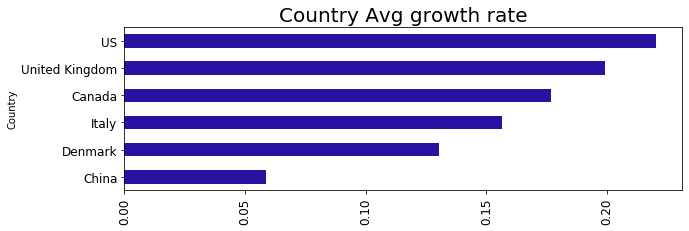

In [23]:
# Grouping mean growth rate pr country.
Country_growth_rate = Country_Time_stats[["GrowthRate","Country"]].groupby(["Country"]).mean()

# filter to only look at focus countries
Country_growth_rate = Country_growth_rate[Country_growth_rate.index.isin(FocusCountries)]

# Plotting the growth rate per FOCUS country.
plt.figure(figsize=[10,3])
plt.title('Country Avg growth rate', fontsize = 20)
Country_growth_rate.GrowthRate.sort_values(ascending=True).plot(kind="barh",color="#2812A1") 
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12, rotation = 90)
plt.show()

In [24]:
# Preparing dataframe for bohek chart
Focus_Country_Time_stats = Country_Time_stats[Country_Time_stats.Country.isin(FocusCountries)]

#Grouping by days since outbreak
Bohek3 = Focus_Country_Time_stats[["GrowthRate","DaysSinceOutbreak",'Country']].groupby(['Country',"DaysSinceOutbreak"]).sum()
Bohek3 = Bohek3.unstack().T

# Reseting index
Bohek3 = Bohek3.reset_index()

# Filtering
Bohek3 = pd.DataFrame(data=Bohek3)

# Printing
del Bohek3['DaysSinceOutbreak']
del Bohek3['level_0']

# Reseting index
Bohek3 = Bohek3.reset_index()
Bohek3 = Bohek3.drop([0, 1])

In [25]:
# Importing source
source3 = ColumnDataSource(Bohek3)

# Defining x axis ticks
days = source3.data['index'].tolist()
days = [ str(x) for x in days ]

# Defining hover tool
TOOLTIPS = [
    ("Day", "$index"),
    ("Country", "$name"),
    ("Growth rate", "@$name"),
]

# Defining Figure
p = figure(x_range = FactorRange(factors=days), plot_height=400, plot_width = 800, title="Country wise timeline of COVID-19 growth rate",
           x_axis_label = 'Days since first death in country',y_axis_label = 'Growth rate',toolbar_location=None,tooltips=TOOLTIPS,x_axis_type=None)


# Defining loop to import dataframe information to tool.
line = {}
items = []
coloring = viridis(len(FocusCountries)) # making list of different colors


# Render glyph
for indx,i in enumerate(FocusCountries):
    line[i] = p.line(x='index',  y=i, source=source3,line_width=2, muted_alpha=0.3,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))
    
# Vertical line
vline = Span(location=24.5, dimension='height', line_color=coloring[0], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])

# Vertical line
vline = Span(location=19.5, dimension='height', line_color=coloring[2], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])

# Vertical line
vline = Span(location=17.5, dimension='height', line_color=coloring[1], line_width=2, line_dash = [6, 3])
p.renderers.extend([vline])
  
# Adding legends
legend1 = Legend(items=items[0:6],click_policy='mute')
legend1.location = "top_right"
p.add_layout(legend1)

ticker = SingleIntervalTicker(interval=5, num_minor_ticks=10)
xaxis = LinearAxis(ticker=ticker)
p.add_layout(xaxis, 'below')

output_file('webpage008.html')
show(p)

Back up screenshot: 

<img src="https://raw.githubusercontent.com/rasmusbrottwitt/coronavirus/master/Charts/screen5.png?token=APC5BG54JQMAG6XGPZMI5MK6YUJ52" width="800" align=left> <br><br><br><br><br><br><br><br><br><br><br>

We see that the growth rate become smaller and smaller - Together with information from death distribution in China seen in bokeh plot 1 the virus looks to follow a sigmoid distribution more than a exponential distribution. Futher more we se that US almost constantly has the highest growth rate up until lockdown before it starts descresing. This shows that the national lockdowns difinetly has great impact. 

### Forecasting future deaths for focused countries

There is many reason why it is interestring to forecast the COVID19 impact in the near future. If a high increase in death rate is forecasted should the hospital probably get ready to help, and furthermore the expected effects of changes can be compared to the actual effects. Equally important, if a decreasing trend in the daily number of deaths suddenly is forecasted it might be time for the government to begin the reopening of the country. Because of the high correlation between COVID19 and the economy which will be futher investigated later could to also be very relevant for stock market changers to look into COVID19 prediction. 

To be able to forecast the near future deathcounts of the selected countries a Machine learning algorithm is implemented. 

The model will use both COVID19 related and demographic features to make the prediction for four days ahead. The model is first trained on all past data and then tested with the data for all countries from 5 days ago in order to compare the predictions with the actual observed number of deaths for the four forecasted days. 

When a model is concluded to perform well enough it is used on the data from today in order to predict four days ahead of time. These predictions will be shown in an interactive bokeh chart. 

The prediction model is trained on all countries, therefore is the Country_Time_stats dataframe used. First is a lot of preprocessing done in order to obtain the wanted COVID19 related feature for the prediction model

In [26]:
# Reseting index and change inf growthrate to 1
Country_Time_stats = Country_Time_stats.reset_index(drop=True)
Country_Time_stats = Country_Time_stats.replace([np.inf, -np.inf], 1)

Making column with number of deaths happened today

In [27]:
# Empty string
death_lag0 = []

for i in range(0,len(Country_Time_stats['Country'])):
    if Country_Time_stats.iloc[i,5] == 2:
        death_lag0.append(Country_Time_stats.iloc[i,1])
    else:
        death_lag0.append(Country_Time_stats.iloc[i,1]-Country_Time_stats.iloc[i-1,1]) 
        
Country_Time_stats['death_lag0'] = death_lag0

Making lags to show the number of deaths for each of the last 4 days

In [28]:
# Making lags
Country_Time_stats['death_lag1'] = Country_Time_stats['death_lag0'].shift(1)
Country_Time_stats['death_lag2'] = Country_Time_stats['death_lag0'].shift(2)
Country_Time_stats['death_lag3'] = Country_Time_stats['death_lag0'].shift(3)
Country_Time_stats['death_lag4'] = Country_Time_stats['death_lag0'].shift(4)

# Correcting overlap between countries when using lags. 
# Correcting lag 1
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 2, 'death_lag1'] = 0 

# Correcting lag 2
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 2, 'death_lag2'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 3, 'death_lag2'] = 0 

# Correcting lag 3
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 2, 'death_lag3'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 3, 'death_lag3'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 4, 'death_lag3'] = 0 

# Correcting lag 4
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 2, 'death_lag4'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 3, 'death_lag4'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 4, 'death_lag4'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 5, 'death_lag4'] = 0 
Country_Time_stats.head()

Confirmed  Deaths  Recovered      Country       Date  DaysSinceOutbreak  \
0         40       1          1  Afghanistan 2020-03-23                  2   
1         74       1          1  Afghanistan 2020-03-24                  3   
2         84       2          2  Afghanistan 2020-03-25                  4   
3         94       4          2  Afghanistan 2020-03-26                  5   
4        110       4          2  Afghanistan 2020-03-27                  6   

   GrowthRate  death_lag0  death_lag1  death_lag2  death_lag3  death_lag4  
0         0.0           1         0.0         0.0         0.0         0.0  
1         0.0           0         1.0         0.0         0.0         0.0  
2         1.0           1         0.0         1.0         0.0         0.0  
3         1.0           2         1.0         0.0         1.0         0.0  
4         0.0           0         2.0         1.0         0.0         1.0

Creating target prediction variables for the next 4 days.

In [29]:
# Making reverse lags to show the number of deaths for each of the next 4 days 
Country_Time_stats['death_future1'] = Country_Time_stats['Deaths'].shift(-1)
Country_Time_stats['death_future2'] = Country_Time_stats['Deaths'].shift(-2)
Country_Time_stats['death_future3'] = Country_Time_stats['Deaths'].shift(-3)
Country_Time_stats['death_future4'] = Country_Time_stats['Deaths'].shift(-4)

# Creating key rows to shows which rows to be deleted due to country overlap
Country_Time_stats['delete_check1'] = Country_Time_stats['DaysSinceOutbreak'].shift(-1)
Country_Time_stats['delete_check2'] = Country_Time_stats['DaysSinceOutbreak'].shift(-2)
Country_Time_stats['delete_check3'] = Country_Time_stats['DaysSinceOutbreak'].shift(-3)
Country_Time_stats['delete_check4'] = Country_Time_stats['DaysSinceOutbreak'].shift(-4)

# Have to delete all the rows before the row containing day 2 since they are messed up
# Making new copy of data with new name in order to be able to compare predicted and actual values later. 
Country_Time_stats_ML = Country_Time_stats[Country_Time_stats.delete_check1 != 2]
Country_Time_stats_ML = Country_Time_stats_ML[Country_Time_stats_ML.delete_check2 != 2]
Country_Time_stats_ML = Country_Time_stats_ML[Country_Time_stats_ML.delete_check3 != 2]
Country_Time_stats_ML = Country_Time_stats_ML[Country_Time_stats_ML.delete_check4 != 2]

Only using last observation for each country as test data - the rest is training data

In [30]:
# making another key in order to know which rows should become test rows 
Country_Time_stats_ML['traintestsplitkey'] = Country_Time_stats_ML['DaysSinceOutbreak'].shift(-1)
Country_Time_stats_ML.head()

Confirmed  Deaths  Recovered      Country       Date  DaysSinceOutbreak  \
0         40       1          1  Afghanistan 2020-03-23                  2   
1         74       1          1  Afghanistan 2020-03-24                  3   
2         84       2          2  Afghanistan 2020-03-25                  4   
3         94       4          2  Afghanistan 2020-03-26                  5   
4        110       4          2  Afghanistan 2020-03-27                  6   

   GrowthRate  death_lag0  death_lag1  death_lag2  ...  death_lag4  \
0         0.0           1         0.0         0.0  ...         0.0   
1         0.0           0         1.0         0.0  ...         0.0   
2         1.0           1         0.0         1.0  ...         0.0   
3         1.0           2         1.0         0.0  ...         0.0   
4         0.0           0         2.0         1.0  ...         1.0   

   death_future1  death_future2  death_future3  death_future4  delete_check1  \
0            1.0            2.0            4.0            4.0            3.0   
1            2.0            4.0            4.0            4.0            4.0   
2            4.0            4.0            4.0            4.0            5.0   
3            4.0            4.0            4.0            4.0            6.0   
4            4.0            4.0            4.0            4.0            7.0   

   delete_check2  delete_check3  delete_check4  traintestsplitkey  
0            4.0            5.0            6.0                3.0  
1            5.0            6.0            7.0                4.0  
2            6.0            7.0            8.0                5.0  
3            7.0            8.0            9.0                6.0  
4            8.0            9.0           10.0                7.0  

[5 rows x 21 columns]

Now the enriched data with demographic information is added to the current dataframe with the current features. 

Not all demographic data was avaiable for all countries. It has been chosen to only use demographic data that was obtainable for all countries. Therefore a quarantine feature has not been included even though it could have been very interestring. 

Included demographic features are age distribution, population, density, urban population and amount of hospital beds which all has the potiential to be very important for the spread of the virus. 

In [31]:
# Inserting enriched data 
df_enriched = pd.read_csv('./Data/enriched_covid_19_week_2.csv')

# Splitting country_state column into two to be able to merch with corona data
df_enriched[['Country','Region']] = df_enriched.Country_Region.str.split("_",expand=True)

df_enriched = df_enriched.drop(columns=['Id','ConfirmedCases',
       'Fatalities','restrictions', 'quarantine', 'schools','Province_State', 'Date','Country_Region','Region','lung', 'femalelung', 'malelung','smokers_perc'])
df_enriched.columns

Index(['age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'density', 'urbanpop', 'hospibed', 'Country'],
      dtype='object')

In [32]:
#Mean computed, grouped by country
df_enriched = df_enriched.groupby(['Country']).mean()
df_enriched

age_0-4   age_5-9  age_10-14  age_15-19  age_20-24  age_25-29  \
Country                                                                       
Afghanistan  0.145717  0.139133   0.133376   0.118922   0.100864   0.079875   
Albania      0.057780  0.058223   0.056356   0.069357   0.079351   0.084899   
Algeria      0.114969  0.105721   0.087145   0.066369   0.068410   0.081500   
Andorra      0.091752  0.093138   0.079824   0.072232   0.077824   0.081867   
Angola       0.176321  0.155301   0.132332   0.107482   0.087706   0.073737   
...               ...       ...        ...        ...        ...        ...   
Uzbekistan   0.102531  0.098063   0.087406   0.075754   0.083131   0.094554   
Venezuela    0.083113  0.096047   0.093466   0.087944   0.073907   0.071343   
Vietnam      0.081083  0.077935   0.072923   0.066786   0.070067   0.088036   
Zambia       0.160273  0.147797   0.132104   0.115404   0.095025   0.077973   
Zimbabwe     0.141119  0.148740   0.129252   0.110267   0.092702   0.074357   

             age_30-34  age_35-39  age_40-44  age_45-49  ...  age_75-79  \
Country                                                  ...              
Afghanistan   0.063662   0.052825   0.042610   0.033516  ...   0.004316   
Albania       0.077811   0.057978   0.052995   0.059250  ...   0.030070   
Algeria       0.085009   0.080899   0.068733   0.055520  ...   0.011719   
Andorra       0.084987   0.074887   0.066841   0.063835  ...   0.014199   
Angola        0.062093   0.050476   0.040488   0.032923  ...   0.003627   
...                ...        ...        ...        ...  ...        ...   
Uzbekistan    0.090543   0.076094   0.062906   0.054531  ...   0.006818   
Venezuela     0.072596   0.069053   0.065682   0.059687  ...   0.013584   
Vietnam       0.086677   0.079762   0.072261   0.067179  ...   0.011573   
Zambia        0.064919   0.053945   0.043964   0.032945  ...   0.003655   
Zimbabwe      0.066937   0.058710   0.049622   0.035006  ...   0.005766   

             age_80-84  age_85-89  age_90-94  age_95-99      age_100+  \
Country                                                                 
Afghanistan   0.001942   0.000628   0.000133   0.000016  1.001841e-06   
Albania       0.018721   0.008127   0.002303   0.000270  1.772187e-05   
Algeria       0.007836   0.003901   0.001171   0.000201  2.196071e-05   
Andorra       0.008182   0.003905   0.001335   0.000213  1.937138e-05   
Angola        0.001824   0.000605   0.000130   0.000015  1.156201e-06   
...                ...        ...        ...        ...           ...   
Uzbekistan    0.004894   0.002024   0.000707   0.000111  1.431167e-05   
Venezuela     0.007968   0.004176   0.001726   0.000523  1.012099e-04   
Vietnam       0.008841   0.006258   0.002821   0.001009  2.450210e-04   
Zambia        0.001790   0.000591   0.000098   0.000007  2.719763e-07   
Zimbabwe      0.002953   0.001040   0.000204   0.000018  1.278348e-06   

             total_pop  density  urbanpop  hospibed  
Country                                              
Afghanistan  38928.341     60.0      25.0       0.5  
Albania       2877.800    105.0      63.0       2.9  
Algeria      43851.043     18.0      73.0       1.9  
Andorra       9240.438    164.0      88.0       2.5  
Angola       32866.268     95.0      67.0       2.7  
...                ...      ...       ...       ...  
Uzbekistan   33469.199     79.0      50.0       4.0  
Venezuela    28435.943     32.0      80.0       0.8  
Vietnam      97338.583    314.0      38.0       2.6  
Zambia       18383.956     25.0      45.0       2.0  
Zimbabwe     14862.927     95.0      67.0       2.7  

[173 rows x 25 columns]

The enriched data is then merched to the COVID19 data. This dataframe now contains both all feeatures and target variables.

In [33]:
# Merging enriched data to corona data
Country_Time_stats_ML = Country_Time_stats_ML.merge(df_enriched, left_on=Country_Time_stats_ML['Country'], right_on=df_enriched.index)
del Country_Time_stats_ML['key_0']

In [34]:
Country_Time_stats_ML.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Country', 'Date',
       'DaysSinceOutbreak', 'GrowthRate', 'death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4', 'death_future1',
       'death_future2', 'death_future3', 'death_future4', 'delete_check1',
       'delete_check2', 'delete_check3', 'delete_check4', 'traintestsplitkey',
       'age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'density', 'urbanpop', 'hospibed'],
      dtype='object')

Before a ML model is fitted to the data some preprocessing has to be handled: 

In [35]:
# Preprocessing of data
Country_Time_stats_ML = Country_Time_stats_ML.dropna() #

Features = ['Deaths','DaysSinceOutbreak', 'GrowthRate','death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4','age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'density', 'urbanpop',
       'hospibed']

Target = ['death_future1','death_future2','death_future3','death_future4']

# Defining train and test dataframes
Train = Country_Time_stats_ML[Country_Time_stats_ML.traintestsplitkey != 2]
Test = Country_Time_stats_ML[Country_Time_stats_ML.traintestsplitkey == 2]

# Feature and target dataframes for both train and test
X_train  = Train.loc[:, Features].values
y_train = Train.loc[:,Target].values
X_test  = Test.loc[:, Features].values
y_test = Test.loc[:,Target].values

# Normalizong the data with StandardScaler
Sc = StandardScaler()

#Important only to fit to the train data!
X_train = Sc.fit_transform(X_train)
X_test = Sc.transform(X_test)

Now a linear regression is fitted to the data to give a baseline for comparison of other regressions. 

Maybe the linear regression turns out to be the best regression model since the model is only predicting 4 days ahead. A four days interval so far has looked aproximately linear because of the narrow interval. 

In [36]:
# Linear regression - baseline for forcast

# Fitting and predicting with linear model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred1 = lin_model.predict(X_test)

# Calculating errors
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred1))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred1))
print()

# Cross validating 
kf = KFold(n_splits=10) #10 fold cross validation
y_pred_c1 = cross_val_predict(lin_model, X_test, y_test, cv=kf)
print('Cross validated Mean Squared Error: ',mean_squared_error(y_test, y_pred_c1))
print('Cross validated Mean Absolute Error: ',mean_absolute_error(y_test, y_pred_c1))

Mean Squared Error:  4107.0795677255655
Mean Absolute Error:  23.985277659757898

Cross validated Mean Squared Error:  23199.35682462164
Cross validated Mean Absolute Error:  49.05925937392628


A cross validated mean absolute error of 49 deaths, which in pracsis means that the model predicts off-target with 49 deaths in average. This is not bad since many countries has several thousand deaths (speaking strictly mathematically). 

Below other regression models are tested:

In [37]:
# Ridge regression
from sklearn import linear_model
Ridge = linear_model.Ridge(alpha=.5)
Ridge.fit(X_train, y_train)
y_pred1 = Ridge.predict(X_test)

# Calculating errors
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred1))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred1))
print()

# Cross validating 
kf = KFold(n_splits=10) #10 fold cross validation
y_pred_c1 = cross_val_predict(Ridge, X_test, y_test, cv=kf)
print('Cross validated Mean Squared Error: ',mean_squared_error(y_test, y_pred_c1))
print('Cross validated Mean Absolute Error: ',mean_absolute_error(y_test, y_pred_c1))


Mean Squared Error:  3342.803368460497
Mean Absolute Error:  20.837033750306162

Cross validated Mean Squared Error:  14625.125279658336
Cross validated Mean Absolute Error:  49.823792695909376


The cross validated mean absolute error is actually worse for the ridge regression than the linear regression, and therefore this regression model is dropped.

In [38]:
#Lasso Regression
Lasso = linear_model.Lasso(alpha=0.1)
Lasso.fit(X_train, y_train)
y_pred1 = Lasso.predict(X_test)

# Calculating errors
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred1))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred1))
print()

# Cross validating 
kf = KFold(n_splits=10) #10 fold cross validation
y_pred_c1 = cross_val_predict(Lasso, X_test, y_test, cv=kf)
print('Cross validated Mean Squared Error: ',mean_squared_error(y_test, y_pred_c1))
print('Cross validated Mean Absolute Error: ',mean_absolute_error(y_test, y_pred_c1))

Mean Squared Error:  3243.1392617853053
Mean Absolute Error:  20.17108453151961

Cross validated Mean Squared Error:  15800.890445693536
Cross validated Mean Absolute Error:  33.96519170481823


The cross validated mean absolute error for the Lasso regression is only 34 deaths! 

This is approximately 15 lower than the linear regression.

In [39]:
#LassoLars regression
LassoLars = linear_model.LassoLars(alpha=0.1)
LassoLars.fit(X_train, y_train)
y_pred1 = LassoLars.predict(X_test)

# Calculating errors
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred1))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred1))
print()

# Cross validating 
kf = KFold(n_splits=10) #10 fold cross validation
y_pred_c1 = cross_val_predict(LassoLars, X_test, y_test, cv=kf)
print('Cross validated Mean Squared Error: ',mean_squared_error(y_test, y_pred_c1))
print('Cross validated Mean Absolute Error: ',mean_absolute_error(y_test, y_pred_c1))

Mean Squared Error:  3623.886358732034
Mean Absolute Error:  20.540801148207997

Cross validated Mean Squared Error:  13548.405872240439
Cross validated Mean Absolute Error:  28.187006917920954


The cross validated mean absolute error for the LassoLars regression is only 28.2 deaths! This is approximately 20 lower that the linear regression MAE. The LassoLars Model clearly gives the best result and is therfore chosen as prediction model to forcast the number of deaths for the next four days. 

The four tested models are futhermore plotted next to each other for comparisons sake. It is clear from the plots that there isn't much difference between the predictions of different models.

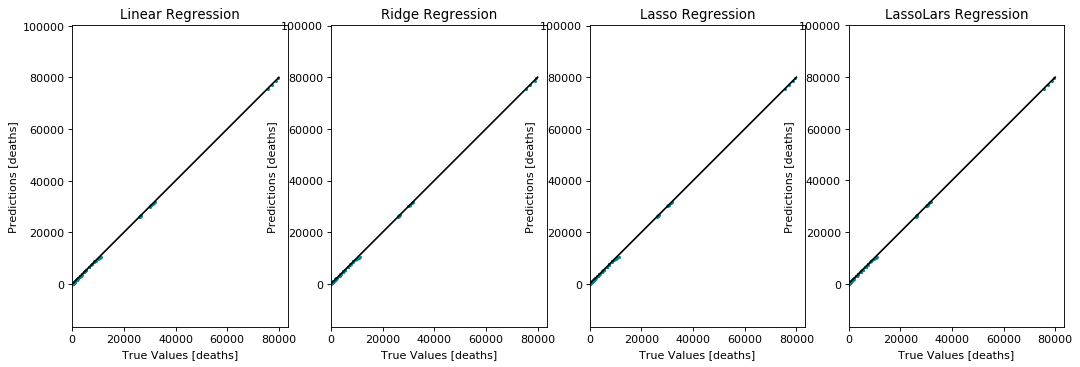

In [40]:
plt.figure(num=None, figsize=(16, 5), dpi=80)

#arrays with predicted values
test_predictions1 = lin_model.predict(X_test).flatten()
test_predictions2 = Ridge.predict(X_test).flatten()
test_predictions3 = Lasso.predict(X_test).flatten()
test_predictions4 = LassoLars.predict(X_test).flatten()

# Funtion for scatter plot
def scatter_plotter(y_test,test_predictions, c, Headline):
    plt.scatter(y_test, test_predictions, s=3, color=c)
    plt.xlabel('True Values [deaths]')
    plt.ylabel('Predictions [deaths]')
    plt.axis('equal')
    plt.xlim([0,plt.xlim()[1]])
    plt.ylim([0,plt.ylim()[1]])
    _ = plt.plot([0, 80000], [0, 80000], color="black")
    plt.title(Headline)
    
 # plots
plt.subplot(1, 4, 1)
scatter_plotter(y_test.flatten(),test_predictions1, "#008C8C", 'Linear Regression')
plt.subplot(1, 4, 2)
scatter_plotter(y_test.flatten(),test_predictions2, "#008C8C" , 'Ridge Regression')
plt.subplot(1, 4, 3)
scatter_plotter(y_test.flatten(),test_predictions3, "#008C8C" , 'Lasso Regression')
plt.subplot(1, 4, 4)
scatter_plotter(y_test.flatten(),test_predictions4, "#008C8C" , 'LassoLars Regression')


The LassoLars Predictions is then added to the test dataframe in order to plot the difference between the actual values and predicted values

In [41]:
#Adding predictions to test dataframe
Test['forecast1'] = y_pred1[:,0]
Test['forecast2'] = y_pred1[:,1]
Test['forecast3'] = y_pred1[:,2]
Test['forecast4'] = y_pred1[:,3]

In [42]:
# Deleting unnecessary coulmns from test dataframe
Test = Test.drop(columns=['Confirmed', 'Recovered',
       'DaysSinceOutbreak', 'GrowthRate', 'death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4', 'death_future1',
       'death_future2', 'death_future3', 'death_future4', 'delete_check1',
       'delete_check2', 'delete_check3', 'delete_check4', 'traintestsplitkey','Deaths','Date',
        'age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'density', 'urbanpop',
       'hospibed'])

Constructing dataframe for predicted values: 

In [43]:
# Predicted values is obtained in a dataframe
prediction_values = Test.set_index('Country')
prediction_values = prediction_values.T

Constructing dataframe for values before prediction:

In [44]:
# Values before prediction starts is obtained in a dataframe
Country_Time_stats_ML
pre_prediction_values = Country_Time_stats_ML[["Country","Deaths","Date"]].groupby(["Date","Country"]).sum().unstack()
pre_prediction_values = pd.DataFrame(data=pre_prediction_values)
pre_prediction_values = pre_prediction_values['Deaths']

# Dropping simbawe to match frames
pre_prediction_values = pre_prediction_values.drop(columns=['Zimbabwe'])

Merging pre prediction values with prediction values

In [45]:
# Dataframe with predictions for plotting
Prediction = pd.concat([pre_prediction_values,prediction_values], ignore_index=True)

Correcting negative forecast trend error to make forcast even better. 

In [46]:
# Correcting negative forecast trend error to make forcast even better. 
# Loop the make sure that a forcasted number of deaths never can be less than the previous forcasted number of deaths.
for c in range(Prediction.shape[1]):
    for i in range(1,Prediction.shape[0]):
        j=i-1
        if Prediction.iloc[i,c] < Prediction.iloc[j,c]:
            Prediction.iloc[i,c] = Prediction.iloc[j,c]

Constructing dataframe of actual values for comparison in plot: 

In [47]:
# Actual values for comparison of predicted values in plot. 
Actual_values = Country_Time_stats[["Country","Deaths","Date"]].groupby(["Date","Country"]).sum().unstack()
Actual_values = pd.DataFrame(data=Actual_values)
Actual_values = Actual_values['Deaths']

# Dropping simbawe to match frames
Actual_values = Actual_values.drop(columns=['Zimbabwe'])
Actual_values = Actual_values.reset_index(drop=True)

The predicted number of deaths can then be prepared to the actual number of deaths

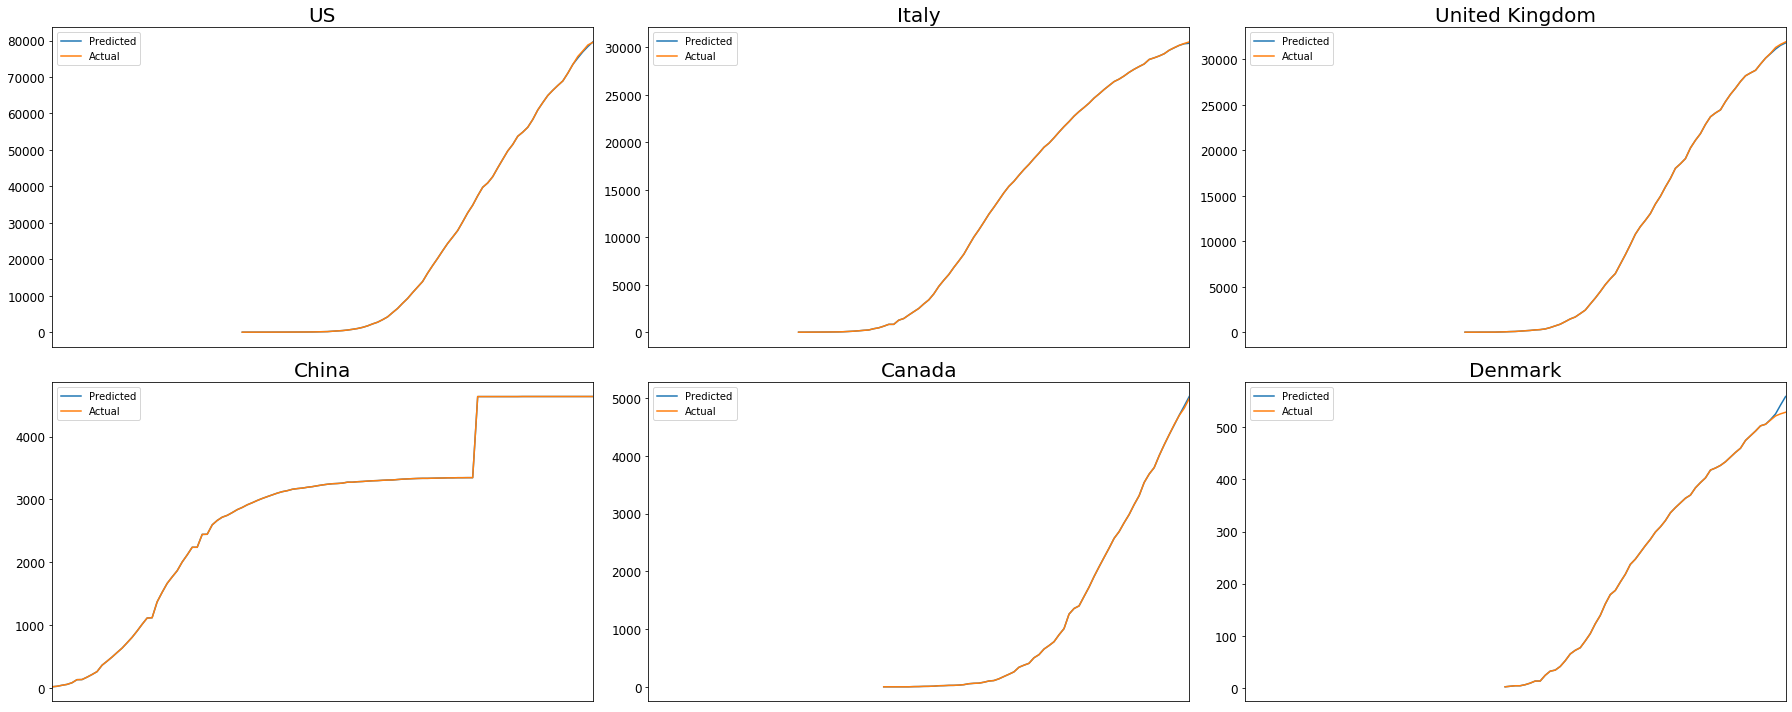

In [48]:
# Plot of predicted vs actual values for country.

plt.figure(figsize=(25,10))
indx=1
for i in FocusCountries:
    
    plt.subplot(2,3,indx)
    plt.title(i, fontsize = 20)
    
    # Plotting lines
    Prediction[i].plot(kind='line')
    Actual_values[i].plot(kind='line')
    
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 20, rotation = 45)
    plt.xticks([])
    plt.xlabel('')
    indx=indx+1
    plt.legend(('Predicted', 'Actual'))
plt.tight_layout()

plt.show()

The prediction model has now been tested and from the above chart can it also be seen that the prediction accuracy is good. Now is an interactive chart with future prediction for the next four days made. 

In [49]:
# Making another key in order to know which rows should become the model input rows 
Country_Time_stats['traintestsplitkey'] = Country_Time_stats['DaysSinceOutbreak'].shift(-1)
Country_Time_stats.head()

# Merging enriched data to corona data
Country_Time_stats= Country_Time_stats.merge(df_enriched, left_on=Country_Time_stats['Country'], right_on=df_enriched.index)
del Country_Time_stats['key_0']

The new input data is then transformed based on the fitted transformation of the original training data

In [50]:
# Updating the data for prediction. 

# Defining the features 
Features = ['Deaths','DaysSinceOutbreak', 'GrowthRate','death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4','age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'density', 'urbanpop',
       'hospibed']

#Updating the X_test dataframe
Test = Country_Time_stats[Country_Time_stats.traintestsplitkey == 2]
X_test  = Test.loc[:, Features].values
X_test = Sc.transform(X_test)

Predictions are then made with the newest data as input data

In [51]:
# Prediction
y_pred2 = LassoLars.predict(X_test)

In [52]:
#Adding predictions to test dataframe
Test['forecast1'] = y_pred2[:,0]
Test['forecast2'] = y_pred2[:,1]
Test['forecast3'] = y_pred2[:,2]
Test['forecast4'] = y_pred2[:,3]

In [53]:
# Deleting unnecessary coulmns from test dataframe
Test = Test.drop(columns=['Confirmed', 'Recovered',
       'DaysSinceOutbreak', 'GrowthRate', 'death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4', 'death_future1',
       'death_future2', 'death_future3', 'death_future4', 'delete_check1',
       'delete_check2', 'delete_check3', 'delete_check4', 'traintestsplitkey','Deaths','Date',
        'age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'density', 'urbanpop',
       'hospibed'])

Just like before is the predicted values for the next four days merged together with all the data leading up the the prediction date. 

In [54]:
# Predicted values
prediction_values = Test.set_index('Country')
prediction_values = prediction_values.T

# Values before prediction starts
pre_prediction_values = Country_Time_stats[["Country","Deaths","Date"]].groupby(["Date","Country"]).sum().unstack()
pre_prediction_values = pd.DataFrame(data=pre_prediction_values)
pre_prediction_values = pre_prediction_values['Deaths']
# Dropping simbawe to match frames
pre_prediction_values = pre_prediction_values.drop(columns=['Zimbabwe'])

# Dataframe with predictions for plotting. - Merging pre prediction values with prediction values
Prediction = pd.concat([pre_prediction_values,prediction_values], ignore_index=True)

Correcting negative forecast trend error to make forcast even better

In [55]:
# Loop the make sure that a forcasted number of deaths never can be less than the previous forcasted number of deaths.
for c in range(Prediction.shape[1]):
    for i in range(1,Prediction.shape[0]):
        j=i-1
        if Prediction.iloc[i,c] < Prediction.iloc[j,c]:
            Prediction.iloc[i,c] = Prediction.iloc[j,c]

Transforming the prediction dataframe to be ready for implementation in bokeh

In [56]:
# Bokeh transformation chart
Bokeh4 = Prediction[FocusCountries]
Bokeh4 = Bokeh4.apply(np.floor)

Configuring the bokeh chart and plotting

In [57]:
# Loading data for bokeh chart
source4 = ColumnDataSource(Bokeh4)

# Generaint x-tics on chart from indexes
days = source4.data['index'].tolist()
days = [ str(x) for x in days ]

# Setting up hover tool for Bokeh
TOOLTIPS = [
    ("Day", "$index"),
    ("Country", "$name"),
    ("Death", "@$name"),
]

# Defining figure
p = figure(x_range = FactorRange(factors=days), plot_height=400, plot_width = 800, title="Country wise Forecast of COVID-19 Deaths",
           x_axis_label = 'Days since first death in world',y_axis_label = 'Death toll',tools='wheel_zoom',tooltips=TOOLTIPS,x_axis_type=None)


# Elements for the plot
line = {}
items = []
coloring = viridis(len(FocusCountries)) # making list of different colors


#Render glyph
for indx,i in enumerate(FocusCountries):
    line[i] = p.line(x='index',  y=i, source=source4,line_width=2, muted_alpha=0.3,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))

# Vertical line
vline = Span(location=109, dimension='height', line_color='grey', line_width=2)
p.renderers.extend([vline])

# Legends and layout
legend1 = Legend(items=items[0:6],click_policy='mute')
legend1.location = "top_left"
p.add_layout(legend1)

# Changing ticker
ticker = SingleIntervalTicker(interval=5, num_minor_ticks=10)
xaxis = LinearAxis(ticker=ticker)
p.add_layout(xaxis, 'below')

# Output
output_file('webpage009.html')
show(p)

Back up screenshot: 

<img src="https://raw.githubusercontent.com/rasmusbrottwitt/coronavirus/master/Charts/screen6.png?token=APC5BG3PORURBSK6KLKDZR26YUJ72" width="800" align=left> <br><br><br><br><br><br><br><br><br><br><br>

The vertical grey line is where the predicted period begins. From this forecast chart is it clear why an almost complete lockdown as early as possible is very effective. Italy has now been in complete lockdown for a month and the number of deaths is forecasted to decline a bit. We also see that US still dont feel the affect of the national lockdown and their dead count is forcasted to contunie. 

### True Number of Infected
*Inspiration found: https://medium.com/@tomaspueyo/coronavirus-act-today-or-people-will-die-f4d3d9cd99ca*

A way to plan potential reopening of US is to look at the true number of infected. Since there is no problem in reopening if almost everybody already hav had the virus. The average time from infection to death is 17 days. This means that if the true mortality rate is 1% then if 1 person dies today was there 100 infected 17 days ago. This information can together with the avg. growth rate for COVID19 be used to give an estimate of the true number of infected in each country. 


First is the dataframe defined

In [58]:
# Defining Dataframe
Trueinfectednumber = Country_Time_stats[['Confirmed','Deaths','Recovered','Country',"Date",'GrowthRate']]
Trueinfectednumber['GrowthRate'] = Trueinfectednumber['GrowthRate'].mean()

Then is the doubling time calculated

In [59]:
# Calculating estimated doubling for COVID19 based on average growth rate. 
Trueinfectednumber['DoublingTime'] = 1/Trueinfectednumber['GrowthRate']

Based on three different mortality rate assumption is three different guesses about the true number of infected made.

In [60]:
# Changing number format
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Calculating the true number of infected based on best guess on 3 mortality rate scenarios. 
Trueinfectednumber['TrueNumberofInfected_5%'] = (Trueinfectednumber['Deaths']/0.05)*(2*np.exp(17/Trueinfectednumber['DoublingTime']))
Trueinfectednumber['TrueNumberofInfected_3%'] = (Trueinfectednumber['Deaths']/0.03)*(2*np.exp(17/Trueinfectednumber['DoublingTime']))
Trueinfectednumber['TrueNumberofInfected_1%'] = (Trueinfectednumber['Deaths']/0.01)*(2*np.exp(17/Trueinfectednumber['DoublingTime']))

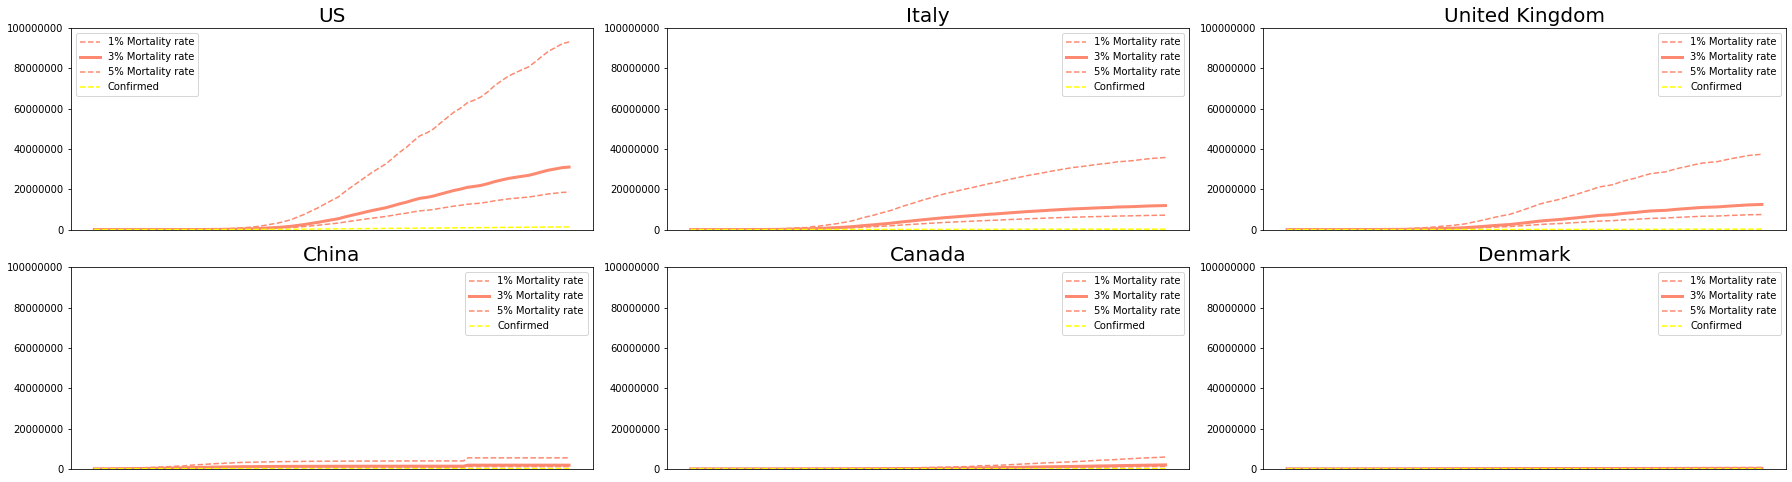

In [61]:
# Plotting true infected number for all countries. 
plt.figure(figsize=(25,20))
for i, elem in enumerate(FocusCountries):
    plt.subplot(6,3,i+1)
    plt.title(elem, fontsize = 20)
    temp_df = Trueinfectednumber[Trueinfectednumber.Country.isin([elem])]
    
    plt.plot(temp_df['Date'],temp_df['TrueNumberofInfected_1%'],'--',c="#FC8970")
    plt.plot(temp_df['Date'],temp_df['TrueNumberofInfected_3%'],c="#FC8970",linewidth=3)
    plt.plot(temp_df['Date'],temp_df['TrueNumberofInfected_5%'],'--',c="#FC8970")
    plt.plot(temp_df['Date'],temp_df['Confirmed'],'--',c="yellow")
    
    #plt.yticks(fontsize = 12,style='plain')
    #plt.xticks(fontsize = 20, rotation = 45)
    plt.ticklabel_format(axis='y', style='plain')
    plt.xticks([])
    plt.ylim([0,100000000])
    plt.xlabel('')
    plt.legend(('1% Mortality rate', '3% Mortality rate','5% Mortality rate', 'Confirmed'))
plt.tight_layout()
plt.savefig('webpage010.png',bbox_inches = 'tight')
plt.show()

The charts dreally shows why it would be very interstring to know the real mortality rate. Relatively small changes is the mortality rate assumption from 3% to 1%  would mean that many many more million people would have had the infection. This is very important information to know when planning a reopening of a country like US 

# Social Media Analysis
---------------
## Initialization 

This analysis will focus on the social media reactions to the coronavirus and the economic consequences of the virus in the US. 

The goal with the analysis is to get insight in how citizens in the US relates to the virus and the consequences of the virus such as the lockdown and economic worries. Futhermore the analysis will look into the global and national awareness of the corona virus the social media.

## 2.2) Basic Stats

The following section is an exploratory data analysis and will look into initial data cleaning and preprocessing and futhermore contain key plots to describe the dataset.


First is the COVID19 dataframe transformed to be per date and only containing deaths and confirmed. Since the use of COVID19 data in this analysis is very specific. Naming this new dataframe df_corona_TW.

In [62]:
# Only keeping data from same period as twitter data
df_corona_TW = df_corona[df_corona['Date'] > '2020-03-03']

# Only keeping data from US
df_corona_TW = df_corona_TW[df_corona_TW['Country/Region'] == 'US']

# Grouping by date
df_corona_TW = df_corona_TW[['Date','Deaths','Confirmed']].groupby(['Date']).sum()

Load of Twitter Data: 

In [63]:
################################################
###Warning: Takes 5 minutes to run code below###
################################################



# String with dates to load twitter data from
dates = ['2020-03-12','2020-03-13','2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18',
        '2020-03-19','2020-03-20','2020-03-21','2020-03-22','2020-03-23','2020-03-24','2020-03-25','2020-03-26',
        '2020-03-27','2020-03-28','2020-03-29','2020-03-30','2020-03-31','2020-04-01','2020-04-02','2020-04-03',
        '2020-04-04','2020-04-05','2020-04-06','2020-04-07','2020-04-08','2020-04-09','2020-04-10','2020-04-11',
        '2020-04-12','2020-04-13','2020-04-14','2020-04-15','2020-04-16','2020-04-17','2020-04-18','2020-04-19',
        '2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-25','2020-04-26','2020-04-27',
        '2020-04-28','2020-04-29','2020-04-30']


# Loading initial twitter data file 
All_tweets = pd.read_csv('./Data/tweets/2020-03-00 Coronavirus Tweets (pre 2020-03-12).CSV')

# Deleting rows without country code to shrink data set into only relevant data. 
All_tweets.dropna(subset = ["country_code"], inplace=True)

# Making loop to load the many ofther twitter data files
for i in dates:
    
    # New data file load 
    df_tweet = pd.read_csv('./Data/tweets/'+str(i)+' Coronavirus Tweets.CSV')
    
    # Deleting rows without country code to shrink data set into only relevant data. 
    df_tweet.dropna(subset = ["country_code"], inplace=True)
    
    # Merging newest load to the main dataframe. 
    All_tweets = pd.concat([All_tweets,df_tweet])

In [64]:
# Cleaning up dataframe - removing columns without importance. 
All_tweets = All_tweets.drop(['screen_name', 'source','reply_to_status_id','reply_to_user_id','reply_to_user_id',
                 'is_quote','is_retweet','friends_count','account_lang','account_created_at',
                 'favourites_count','reply_to_screen_name'], axis=1)

Size of twitter dataframe is printed below to check load

In [65]:
All_tweets.shape

(1308276, 11)

Reformatting the datetime format and adding data column to the dataframe

In [66]:
# Reformatting the datetime column
# Importing time package
import time

# Defining empty datatime list
Datetime = []

# Looping over all date values in weather dataframe and appending correct matching datetime format to datetime list.
for i in All_tweets["created_at"].values:
    strp  = time.strptime(i[:19], "%Y-%m-%dT%H:%M:%S")
    strf = time.strftime("%Y-%m-%d %H:%M:%S", strp)
    Datetime.append(strf)
    
# Renaming datetime column to match column name for rounded datatime data in crime dataframe
All_tweets['Datetime'] = pd.to_datetime(Datetime)

# Removing original datatime column from dataset
All_tweets = All_tweets.drop(['created_at'], axis=1)

# Adding date
All_tweets['Date'] = pd.DatetimeIndex(All_tweets['Datetime']).date
All_tweets['Date'] = pd.to_datetime(All_tweets['Date'])

Printing a distribution plot of the daily amount of tweets about COVID19 since start march. It can be seen that the tweet amount peaked around mid-late march and then stabelized at a lower level in april. 

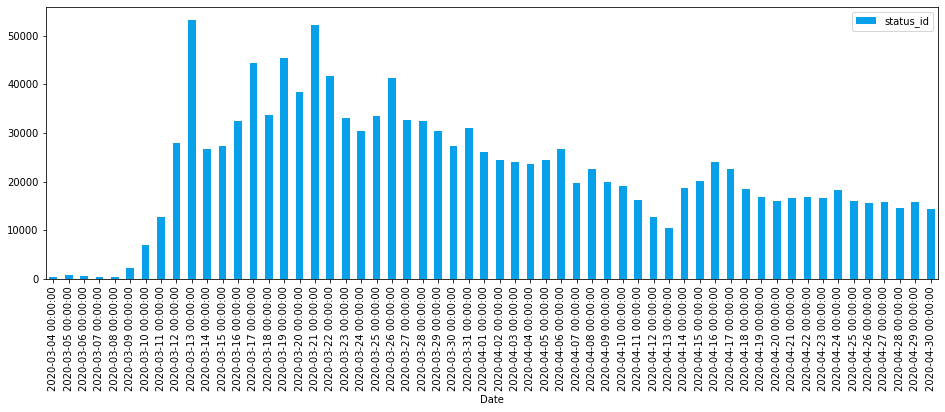

In [67]:
All_tweets[['Date','status_id']].groupby('Date').count().plot(kind='bar',color='#08a0e9',figsize=(16,5))
plt.show()

------------
## 3.2 ) Data Analysis

### Social trends

Social media trends can be very powerful and is clearly the best way of showing the oppion of the people. This analysis can thereby help show how the people of US experience the COVID19 pandemic. In the following part will the text in the tweets be analysized in order to show eventual trends of topics. 

First is a text processing function made to clean the tweeted texts. 

For this part will the focus be on tweets made in US. 

In [68]:
# Defining stop words 
my_stop_words = stop_words.ENGLISH_STOP_WORDS

# Text processing function
def text_processing(text):
    # Remove punctuation 
    text = "".join([c for c in text 
                    if c not in string.punctuation])
    # Set all to lowercase
    text = "".join([c.lower() for c in text])
    # Remove stop words
    text = " ".join([w for w in text.split() 
                     if w not in my_stop_words])
    return text

In [69]:
# Only focusing on tweets from US
text_tweets = All_tweets[All_tweets['country_code'] == 'US']

# Only focusing on english language tweets
text_tweets = text_tweets[text_tweets['lang'] == 'en']

# Dropping eventual NaN values. 
text_tweets.dropna()

# Making a column in the dataframe for all tweets with the cleaned text - the text processing function is applied
text_tweets['clean text'] =text_tweets['text'].apply(text_processing)

Five trends of interest is analyzied by analysing the occurrence of some key words connected to the given trend.

In [70]:
# Adding one hot encoded columns to dateframe based on whether or not certain words was a part of a given tweet. 
text_tweets['Just a flu'] = text_tweets['clean text'].str.contains('|'.join(['hoax','lies',
                                                                            'fake','flu','cold'])).astype(int)

text_tweets['Apocalypse'] = text_tweets['clean text'].str.contains('|'.join(['crisis','run',
                                                                            'coronapocalypse',
                                                                            'coronapocolypse'])).astype(int)

text_tweets['Stayhome'] = text_tweets['clean text'].str.contains('|'.join(['socialdistancing','stayhome', 
                                                                           'quarantine','stayathome','quarantinelife',
                                                                           'lockdown','distancing','flattenthecurve',
                                                                           'stayhomesavelives','washyourhands',
                                                                           'sanitizer'])).astype(int)

text_tweets['Economics'] = text_tweets['clean text'].str.contains('|'.join(['workers', 'work', 
                                                                                 'business', 'job', 'money',
                                                                                 'economy','businesses','employees',
                                                                                 'office','restaurants',
                                                                                 'unemployment','company','companies',
                                                                                 'colleagues','paid',
                                                                                 'customers'])).astype(int)

text_tweets['Reopen!'] = text_tweets['clean text'].str.contains('|'.join(['open','reopen'])).astype(int)

# Grouping categories of interest by the date. 
gb1 = text_tweets[['Date','Just a flu','Economics','Apocalypse','Stayhome','Reopen!']].groupby('Date').sum()

Plotting US Twitter Reactions to COVID-19 

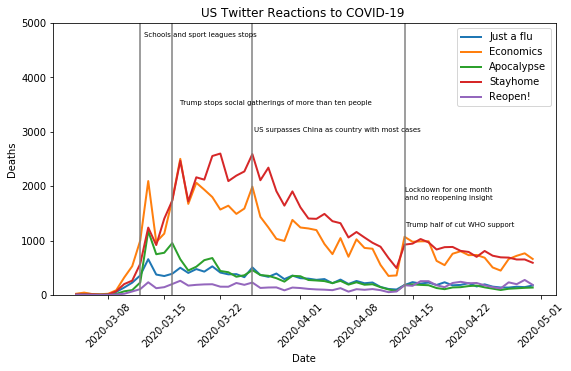

In [71]:
# Defining secondary axis
fig, ax1 = plt.subplots(figsize=[9,5])
#ax2 = ax1.twinx()

# Title and axis labels
plt.title("US Twitter Reactions to COVID-19 ",fontsize=12)
plt.xlabel('Date')
plt.ylabel('Deaths')
ax1.set_ylim(0,5000)

# Plotting lines
ax1.plot(gb1.index,gb1['Just a flu'], linewidth=2)
ax1.plot(gb1.index,gb1['Economics'], linewidth=2)
ax1.plot(gb1.index,gb1['Apocalypse'], linewidth=2)
ax1.plot(gb1.index,gb1['Stayhome'], linewidth=2)
ax1.plot(gb1.index,gb1['Reopen!'], linewidth=2)
#ax2.plot(df_corona_TW.index,df_corona_TW['Deaths'],'--', linewidth=3)

# Vertical lines and comments
plt.axvline(x='2020-03-12',c='grey')
plt.annotate('Schools and sport leagues stops',xy=(0.18, 0.95), xycoords='axes fraction',size=7)
plt.axvline(x='2020-03-16',c='grey')
plt.annotate('Trump stops social gatherings of more than ten people',xy=(0.25, 0.7), xycoords='axes fraction',size=7)
plt.axvline(x='2020-03-26',c='grey')
plt.annotate('US surpasses China as country with most cases',xy=(0.40, 0.6), xycoords='axes fraction',size=7)
plt.axvline(x='2020-04-14',c='grey')
plt.annotate('Lockdown for one month',xy=(0.7, 0.38), xycoords='axes fraction',size=7)
plt.annotate('and no reopening insight',xy=(0.7, 0.35), xycoords='axes fraction',size=7)
plt.annotate('Trump half of cut WHO support ',xy=(0.7, 0.25), xycoords='axes fraction',size=7)
plt.xticks(rotation=45)

# Adding legends
ax1.legend(('Just a flu', 'Economics', 'Apocalypse','Stayhome','Reopen!'),loc=1)

#ax2.legend(['Deaths'],loc=6)
plt.savefig('webpage011.png',bbox_inches = 'tight')
plt.show()

Many interesting trends can be seen in the above chart. First of all does it seem like the closing of schools and sport leagues as well a leak of a pretty pessimistic secret report kickstarted the american puplic COVID19 attention on twitter. 

It can also be seen that both the "just a flu"-tweets and the "Apocalypse"-tweets are peaking around this date. However since the peak has both the amount of "just a flu"-tweets and the "Apocalypse"-tweets been steadly decreasing. It certainly looks like people found out that this not is our doom as humans but neither just a basic flu. 

In general is the amount of tweets concerned about economics and preventing spread almost the same. In other words does the economics consequense of the virus get just as much attention as how to avoid the virus spread. When looking only at the "Economics"-tweets trend can it be seen that a big increase in social media attention happened the same day as US had been in lockdown for almost a month and the gonvernment made a statement with no reopening insight.

This is also the date where the 'Reopen!'-tweets starts to increase. 

Now is a deep dive into the tweets concerned with economics made

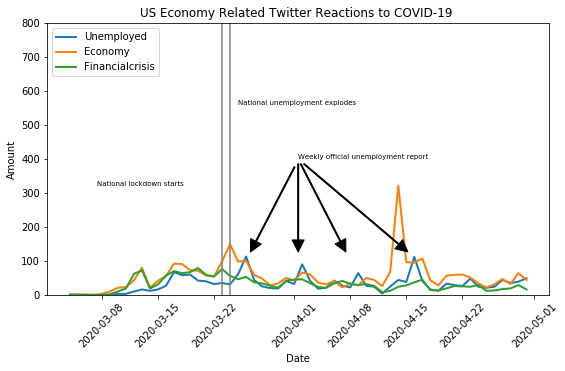

In [72]:
# ECONOMY DEEPDIVE
text_tweets['Unemployed'] = text_tweets['clean text'].str.contains('|'.join(['unemployment','unemployed'])).astype(int)
text_tweets['Economy'] = text_tweets['clean text'].str.contains('|'.join(['economy','economics'])).astype(int)
text_tweets['Financialcrisis'] = text_tweets['clean text'].str.contains('|'.join(['financialcrisis','financial','2007','2008','bankcollaps','banks'])).astype(int)

# Grouping categories of interest by the date. 
gb2 = text_tweets[['Date','Unemployed','Economy','Financialcrisis']].groupby('Date').sum()

# Plot of COVID-19 Twitter Development
# Defining secondary axis
fig, ax1 = plt.subplots(figsize=[9,5])
#ax2 = ax1.twinx()

plt.title("US Economy Related Twitter Reactions to COVID-19 ")
plt.xlabel('Date')
plt.ylabel('Amount')
ax1.set_ylim(0,800)

# Plotting lines
ax1.plot(gb2.index,gb2['Unemployed'], linewidth=2)
ax1.plot(gb2.index,gb2['Economy'], linewidth=2)
ax1.plot(gb2.index,gb2['Financialcrisis'], linewidth=2)
#ax2.plot(df_corona_TW.index,df_corona_TW['Deaths'],'--', linewidth=3)

# Vertical lines and comments
plt.axvline(x='2020-03-24',c='grey')
plt.annotate('National lockdown starts',xy=(0.1 , 0.4), xycoords='axes fraction',size=7)
plt.axvline(x='2020-03-23',c='grey')
plt.annotate('National unemployment explodes',xy=(0.38 , 0.70), xycoords='axes fraction',size=7)

plt.annotate('Weekly official unemployment report', xy=(0.40 , 0.14),xytext=(0.5, 0.5), xycoords='axes fraction',size=7,
             arrowprops=dict(facecolor='black', shrink=0.05, width=1))
plt.annotate('', xy=(0.5 , 0.14),xytext=(0.5, 0.5), xycoords='axes fraction',size=7,
             arrowprops=dict(facecolor='black', shrink=0.05, width=1))
plt.annotate('', xy=(0.6 , 0.14),xytext=(0.5, 0.5), xycoords='axes fraction',size=7,
             arrowprops=dict(facecolor='black', shrink=0.05, width=1))
plt.annotate('', xy=(0.73, 0.14),xytext=(0.5, 0.5), xycoords='axes fraction',size=7,
             arrowprops=dict(facecolor='black', shrink=0.05, width=1))
plt.xticks(rotation=45)

# Adding legends
ax1.legend(('Unemployed', 'Economy', 'Financialcrisis'),loc=2)

#ax2.legend(['Deaths'],loc=6)
plt.savefig('webpage012.png',bbox_inches = 'tight')
plt.show()

The chart shows us a weekly trend in the 'Unemployed'-tweets. Futher investigation showed that these tweets peak the same day as the weekly official unemployment number report surfaces. This trend has been happening since few days after the lockdown officially started. Futhermore is a huge jump in tweets about economy happening the day where the government states that no reopening is insight. This clearly shows the people's high concerns with the economic situation that the lockdown causes which also often has been compared to the financial crisis in 2008. 


### General COVID19 awareness

The question now is if this attracts more attention in US than in other parts of the world. And where is US does the people concerned about corona live. The following section will try to find a pattern. 

In order to translate city data to latitude and longitude and get more precise location heatmap is it only tweets with city location that are kept.

In [73]:
All_tweets['number'] = All_tweets['Date'].dt.strftime("%Y%m%d").astype(int)
All_tweets_localmap = All_tweets[All_tweets['place_type']=='city']

Converting city names to latitude and longitude coordinates

In [74]:
# Dateframe to convert country code in twitter data to latitude and longitude coordinates.
df_City_lat_long = pd.read_csv('./Data/World_Cities_Location_table.csv',sep=';',header=None)

In [75]:
# Defining column names
df_City_lat_long['City'] = df_City_lat_long.iloc[:,2]
df_City_lat_long['Latitude'] = df_City_lat_long.iloc[:,3]
df_City_lat_long['Longitude'] = df_City_lat_long.iloc[:,4]

# Cleaning up the dateframe
del df_City_lat_long[0]
del df_City_lat_long[1]
del df_City_lat_long[2]
del df_City_lat_long[3]
del df_City_lat_long[4]
del df_City_lat_long[5]

# Making All_tweets_localmap dataframe ready to be merched with coordinates.
All_tweets_localmap['City'] = All_tweets_localmap.loc[:,'place_full_name'].str.split(',').str[0]
del All_tweets_localmap['place_type']
del All_tweets_localmap['place_full_name']

# Merging latitude and longitude city coordinates on to twitter data
All_tweets_localmap = All_tweets_localmap.merge(df_City_lat_long, on='City')

Now an interactive heatmap of a COVID19 awareness on twitter both locally and globally can be plotted. 

**Picture of heatmap**

In [99]:
# Heatmap of COVID.19 Tweets in countries
hMap3 = folium.Map(width=800,height=400,location=[0, 0], zoom_start=2)

# Filter the DF
Local_Heat_tweets = All_tweets_localmap[['Latitude', 'Longitude']]

# List comprehension to make out list of lists
Local_Heat_tweets = [[row['Latitude'],row['Longitude']] for index, row in Local_Heat_tweets.iterrows()]

# Plot it on the map
HeatMap(Local_Heat_tweets,radius=12, max_zoom=20).add_to(hMap3)
hMap3.save('webpage013.html')
hMap3

Back up screenshot: 

<img src="https://raw.githubusercontent.com/rasmusbrottwitt/coronavirus/master/Charts/screen7.png?token=APC5BG6ZJBXENO4SZI373Z26YUKAU" width="800" align=left> <br><br><br><br><br><br><br><br><br><br><br>

When looking globally it seems like the Social Media awareness across the contries are about the same. Offcourse with a higher awareness in the heavely affected contries such as US and the europiean countries. When zooming into US can it a bit surprisingly be seen that the awareness in the middel of US is almost non exsisting (Or they dont use twitter ) while there is high awareness close to the coasts. 

Further more can an interactive heatmap over time of a COVID19 awareness on twitter also be plotted.

In [100]:
# Heatmap running from start march to end march of COVID.19 Tweets in countries
hMap4 = folium.Map([0, 0], zoom_start=2)

#Create weight column, using day number
Local_Heat_tweets2 = All_tweets_localmap[['Latitude', 'Longitude','number']]

# List comprehension to make out list of lists
Local_Heat_tweets2 = [[[row['Latitude'],row['Longitude']] for index, row in Local_Heat_tweets2[Local_Heat_tweets2['number'] == i].iterrows()] for i in chain(range(20200303,20200331),range(20200401, 20200431))]

# Plot it on the map
hm = plugins.HeatMapWithTime(Local_Heat_tweets2,auto_play=True,max_opacity=0.7, min_speed = 5.0,radius=6)
hm.add_to(hMap4)

#Display the map
hMap4

Back up screenshot: 

<img src="https://raw.githubusercontent.com/rasmusbrottwitt/coronavirus/master/Charts/screen8.png?token=APC5BG4X54XLPJK6FET37X26YUKBA" width="800" align=left> <br><br><br><br><br><br><br><br><br><br><br>

# Economic Impact Analysis
---------------
## Initialization 

A large aspect in the outbreak of Corona Virus has been the impact on the American Economy, individuals, companies and the state. 

To further gain an understanding of how the coronavirus already has and potentially will hit the American economy, we will look further into each of these aspects individually and try to gain a conclusion on all areas based on these. 

Specifically, we will first give a brief introduction to the movements in the market over the last years, and narrow in on the largest companies to show how stable they have been in the past. 

Then we will dive into the banks of America, and explain why their value is essentiel to the american economy, 

Following this, we will dive into numbers of employment and poverty in America and how these have fluctuated in the past

## 2.3) Basic Stats

### Data Sources
We have used Yahoo Finance to access data from the stock market in the United States, and other than that we have used a set of standard libraries used in this course. 

### Dates 
We have identified a simple start date being 50 years back in time from hand in date. 

This will give us a broad view of general movements in the market - for instance, showing if the financial crisis was a once in a decade or more of a once in a century type of event. 

In [78]:
start = "1970-05-06"
end   = "2020-05-11"

financialStart = "2008-01-01"
financialEnd = "2010-01-01"

## The general stock market
First, we will get a view of the state of the American Economy from a business value perspective in general. 

We will look at both the movements of the 30 largest companies in America - known as the Dow Jones index - and the New York Stockmarket, knows as NASDAQ. 

We gain access to the market using the Yahoo Finance package mentioned previously. 
We plot the Close prices to have a single daily value. 

In [79]:
# List of all companies and their symbol code
company_names = [
'3M',
'American Express',
'Apple',
'Boeing',
'Caterpillar',
'Chevron',
'Cisco Systems',
'Coca-Cola',
'Dow Inc.',
'ExxonMobil',
'Goldman Sachs',
'The Home Depot',
'IBM',
'Intel',
'Johnson & Johnson',
'JPMorgan Chase',
'McDonald\'s',
'Merck & Company',
'Microsoft',
'Nike',
'Pfizer',
'Procter & Gamble',
'Travelers',
'UnitedHealth Group',
'United Technologies',
'Verizon',
'Visa',
'Walmart',
'Walgreens Boots Alliance',
'Walt Disney',
]

symbols = [
'MMM',
'AXP',
'AAPL',
'BA',
'CAT',
'CVX',
'CSCO',
'KO',
'DOW',
'XOM',
'GS',
'HD',
'IBM',
'INTC',
'JNJ',
'JPM',
'MCD',
'MRK',
'MSFT',
'NKE',
'PFE',
'PG',
'TRV',
'UNH',
'UTX',
'VZ',
'V',
'WMT',
'WBA',
'DIS',
]  

In [80]:
# Initializing dataframe with random stock from list
df1 = yf.download('MMM', start='2020-01-01', end=end)
df1 = pd.DataFrame(df1['Close'])

# Downloading all stocks from Dow Jones to access for Bokeh chart
for i in symbols:
    df2=yf.download(i, start='2020-01-01', end=end)
    df2['Close']
    df1[i] = df2['Close']
    
# Close Dataframe
del df1['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [81]:
#Transformations to Bokeh compliant dataframae
Bokeh5 = df1
Bokeh5 = Bokeh5.apply(np.floor)
Bokeh5 = Bokeh5.reset_index()
del Bokeh5['Date']

In [82]:
#Generating plot
source5 = ColumnDataSource(Bokeh5)

# Ticks for X axis
days = df1.index.date.tolist()
days = [ str(x) for x in days ]

# Tooltips for hovering
TOOLTIPS = [
    ("Stock Name", "$name"),
    ("Stock Index", "@$name"),
]

# Define figure
p = figure(x_range = FactorRange(factors=days), plot_height=500, plot_width = 800, title="DOW Jones Stocks",
           x_axis_label = 'Date',y_axis_label = 'Stock Index',tools='wheel_zoom',tooltips=TOOLTIPS)

# Legends and formatting from palette
line = {}
items = []
coloring = inferno(15)+viridis(15) # making list of different colors


#Render glyph
for indx,i in enumerate(Bokeh5.columns):
    line[i] = p.line(x='index',  y=i, source=source5,line_width=2, muted_alpha=1,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))


#Orientation of label and output
p.xaxis.major_label_orientation =3.1415/2
output_file('webpage014.html')

# Show Bokeh plot
show(p)

Back up screenshot: 

<img src="https://raw.githubusercontent.com/rasmusbrottwitt/coronavirus/master/Charts/screen9.png?token=APC5BG4BTQTPGE5WZOZP2H26YUKBI" width="800" align=left> <br><br><br><br><br><br><br><br><br><br><br>

Luckily, these can also be called as a single subject from Yahoo Finance accumulated to see the change in the top 30 american stocks over time.

[*********************100%***********************]  1 of 1 completed


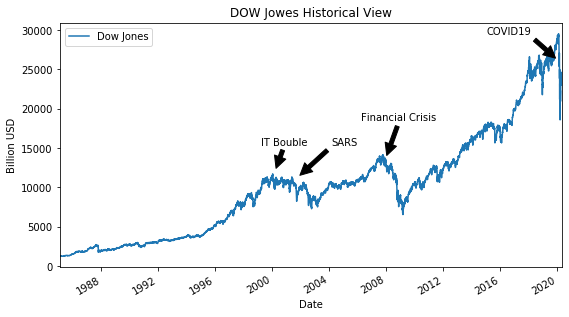

In [83]:
# Download Dow Jones
DowJones  = yf.download("^DJI", start=start, end=end) 

# Plot closing values
DowJones['Close'].plot(figsize=(9, 5)) 

# Add legends and labels
plt.legend(['Dow Jones'])
plt.ylabel('Billion USD')
plt.title('DOW Jowes Historical View')

# Adding text and arrows
plt.annotate('Financial Crisis', xy=(0.65, 0.45),xytext=(0.6, 0.6), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('IT Bouble', xy=(0.43, 0.4),xytext=(0.4, 0.5), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('SARS', xy=(0.475, 0.37),xytext=(0.54, 0.50), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('COVID19', xy=(0.99, 0.85),xytext=(0.85, 0.95), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))

# Save figure to output for website 
plt.savefig('webpage015.png',bbox_inches = 'tight')

# Show figure
plt.show()

As it can be seen, the Dow Jones has grown since it was introduced in 1986, with some smaller and larger bumps on the way. 

If we some in to the recent years after the financial crisis, we can see how the Dow Jones has dropped rapidly now after several years of growth - but now has seen a rise again. 

[*********************100%***********************]  1 of 1 completed


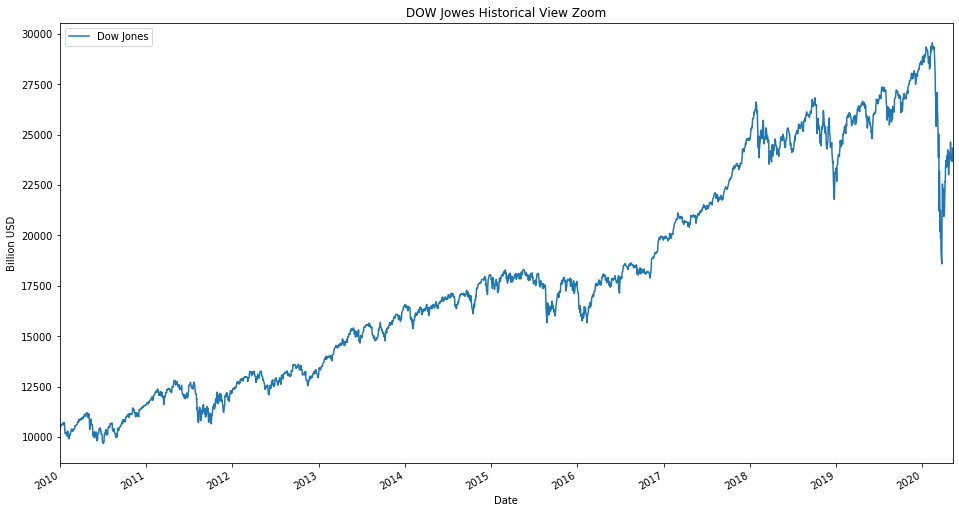

In [84]:
# Focus on years after crack 
DowJones20082020  = yf.download("^DJI", start=financialEnd, end=end) 

# Plot closing values
DowJones20082020['Close'].plot(figsize=(16, 9))

# Layout
plt.title('DOW Jowes Historical View Zoom')
plt.ylabel('Billion USD')
plt.legend(['Dow Jones'])

[*********************100%***********************]  1 of 1 completed


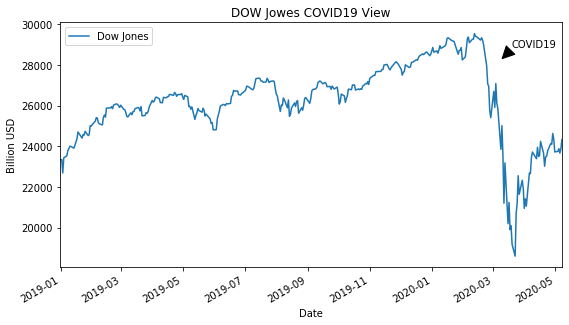

In [85]:
# Focus on Dow Jones recent years
DowJones2020  = yf.download("^DJI", start="2019-01-01", end=end) 

# Plot closing values
DowJones2020['Close'].plot(figsize=(9, 5))

# Formatting
plt.legend(['Dow Jones'])
plt.title('DOW Jowes COVID19 View')
plt.ylabel('Billion USD')
plt.annotate('COVID19', xy=(0.88, 0.85),xytext=(0.90, 0.90), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))

# Save figure for output
plt.savefig('webpage016.png',bbox_inches = 'tight')

A focus on 2020 isolated shows us why the concerns were so severe - after a couple of years of steady growth following the financial crisis, the Dow Jones was hit hard by the shock of the Corona Virus. But the dip was nothing compared to the Financial Crisis

[*********************100%***********************]  1 of 1 completed


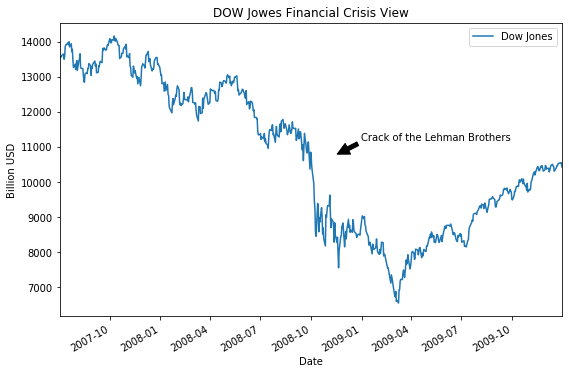

In [86]:
# Download Dow Jones for Financial Crisis data
DowJonesFinancialCrisis  = yf.download("^DJI", start="2007-07-01", end="2010-01-01") 

# Plot closing values
DowJonesFinancialCrisis['Close'].plot(figsize=(9, 6))

# Setting up plot layout
plt.legend(['Dow Jones'])
plt.ylabel('Billion USD')
plt.title('DOW Jowes Financial Crisis View')
plt.annotate('Crack of the Lehman Brothers', xy=(0.55, 0.55),xytext=(0.60, 0.60), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))

# Save figure for website layout
plt.savefig('webpage017.png',bbox_inches = 'tight')

As it can be seen, the Dow Jones has grown since it was introduced in 1986. Clearly, the market has it's ups and downs, some more drastic than others. Some historic moments with great impacts on the economy are remarkably clear

- The rise and burst of the IT bubble (mid 2002)
- The Financial Crisis (mid 2008)
- Covid 19 (present)

For reference, Sars has also been annotatated to show its lesser significance on the market. Many feared Sars would turn into a pandemic - but since it didn't, it is clear from the movements in the economy that the fear did not have an effect compared to the lockdown to stall the coronavirus.

A focus on the recent years after the financial crisis, show that the Dow Jones has dropped rapidly during the corona pandemic after several years of growth - but the last weeks it has seen a rise again.

Compared to the previous large drop in value, the Financial Crisis, some major differences are clear

The financial crisis was a long period of build up, followed by months of steady decline to almost half of the peak value, and culminating with a huge drop following the collapse of the Lehman Brothers (https://en.wikipedia.org/wiki/Bankruptcy_of_Lehman_Brothers). Then, years of stabilisation and steady growth followed.

On the other hand with the Corona Virus pandemic, the shock was abrupt and the market declined rapidly over a few days or weeks from 30000 billion USD to 18000 billion USD - almost a 40% drop in no time. But following this massive drop, the shock seemed to have had a lesser imidate impact - and even a massive bump up.

Basically, the situations are completely different, but both have had huge effects on the future of companies. The financial crisis was caused by a rotten economy, with fragile and fraud loan structures. Essentially, the banks had way less money than they thought, and a lot of people had mortgages they could never pay - meaning the banks had value (houses) they could not turn into money. Lots of unemployed people with no money or places to live meant troubled times ahead for companies selling - and combined with the market not having as much money as expected, the value dropped.

The drop folowing the Corona Virus was a result of a shock of the incoming global lockdown and the news that people would not be buying on the market in the near future. Therefore, the value of companies fell drastically - no buying means no selling, and no selling means no money in the bank. Therefore, lots of companies have had to lay off employees and find ways to stay a float. However, as it can be seen, the value quickly went back to normal and the Dow Jones even had it's best day ever in absolute change, and top 5 relatively speaking.

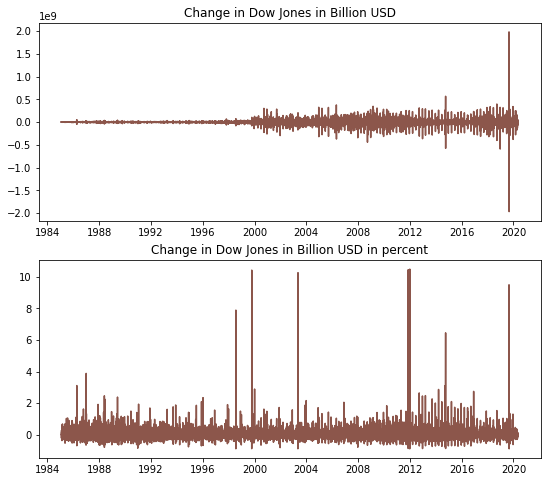

In [87]:
plt.figure(num=None, figsize=(9, 8))
DowJonesChange = DowJones.diff(1)

plt.subplot(2, 1, 1)
plt.plot(DowJonesChange)
plt.title(('Change in Dow Jones in Billion USD'))
DowJonesChangeP = DowJones.pct_change(1)

plt.subplot(2, 1, 2)
plt.plot(DowJonesChangeP)
plt.title(('Change in Dow Jones in Billion USD in percent'))
plt.savefig('webpage018.png',bbox_inches = 'tight')
plt.show()

## 3.3) Data Analysis

## Banks
- Analyzing the impact on American Banks
- Comparing different previous crisis

We have now investigated briefly how the stock market in general was affected. Now let us look at the big six banks in America - namely the banks noted too big to fail! 

"Too big to fail" describes a business or sector whose collapse would cause catastrophic damage to the economy.
The government will often intervene in situations where failure poses a grave risk to the economy.
One example of such intervention was the Emergency Economic Stabilization Act of 2008, which included the $700 billion Troubled Asset Relief Program (TARP). 

Banks that the U.S. Federal Reserve has said could threaten the stability of the U.S. financial system include the following:

- Bank of America Corporation
- The Bank of New York Mellon Corporation
- Barclays PLC
- Citigroup Inc.
- Credit Suisse Group AG
- Deutsche Bank AG
- The Goldman Sachs Group, Inc.
- JP Morgan Chase & Co.
- Morgan Stanley
- State Street Corporation
- UBS AG
- Wells Fargo & Company

We have imported the banks using Yahoo Finances data reader

In [88]:
# Download six major banks using Yahoo Finance
JPM  = yf.download("JPM", start=start, end=end) # JP Morgan

BAC  = yf.download("BAC", start=start, end=end) # Bank of America

C    = yf.download("C", start=start, end=end)   # Citygroup

GS   = yf.download("GS", start=start, end=end)  # Goldman Sachs

MS   = yf.download("MS", start=start, end=end)  # Morgan Stanley

WFC  = yf.download("WFC", start=start, end=end) # Wells Fargo

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


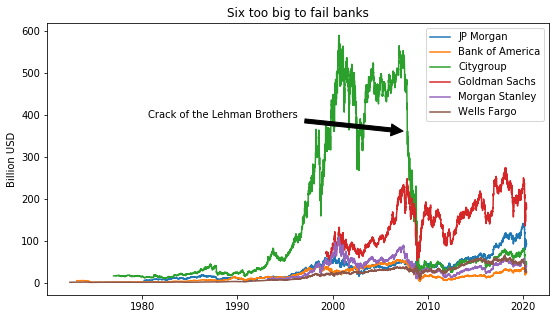

In [89]:
# Set up plot 
plt.figure(num=None, figsize=(9, 5))
plt.plot(JPM['Close'])
plt.plot(BAC['Close'])
plt.plot(C['Close'])
plt.plot(GS['Close'])
plt.plot(MS['Close'])
plt.plot(WFC['Close'])
plt.title('Six too big to fail banks')
plt.ylabel('Billion USD')
plt.legend(('JP Morgan', 'Bank of America','Citygroup', 'Goldman Sachs', 'Morgan Stanley', 'Wells Fargo'))

# Annotations
plt.annotate('Crack of the Lehman Brothers', xy=(0.72, 0.6),xytext=(0.2, 0.65), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))

# Save figure for website
plt.savefig('webpage019.png',bbox_inches = 'tight')

# Show figure
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


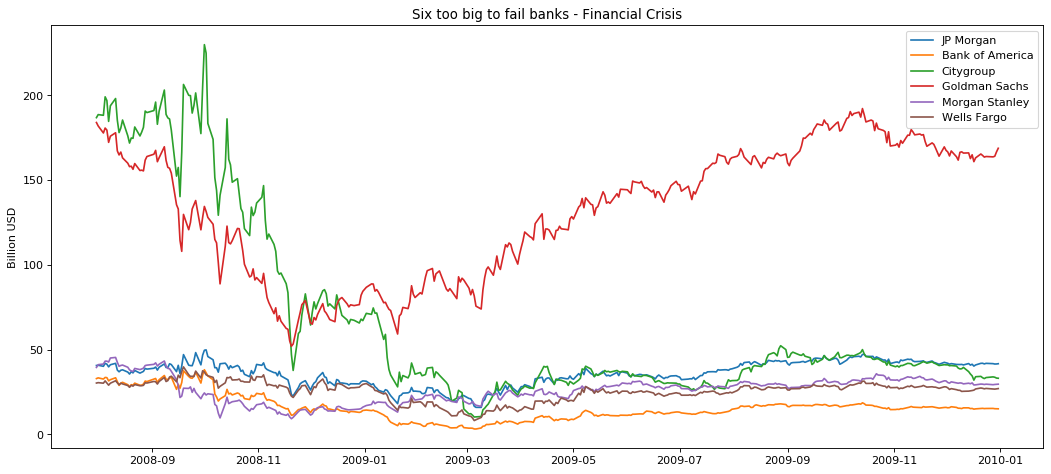

In [90]:
# Dates of the financial crack
crackstart = "2008-08-01"
crackend   = "2010-01-01"

# Download banks as previously
JPMcrack  = yf.download("JPM", start=crackstart, end=crackend) # JP Morgan

BACcrack  = yf.download("BAC", start=crackstart, end=crackend) # Bank of America

Ccrack    = yf.download("C", start=crackstart, end=crackend)   # Citygroup

GScrack   = yf.download("GS", start=crackstart, end=crackend)  # Goldman Sachs

MScrack   = yf.download("MS", start=crackstart, end=crackend)  # Morgan Stanley

WFCcrack  = yf.download("WFC", start=crackstart, end=crackend) # Wells Fargo

# Set up figure
plt.figure(num=None, figsize=(16, 7), dpi=80)
plt.plot(JPMcrack['Close'])
plt.plot(BACcrack['Close'])
plt.plot(Ccrack['Close'])
plt.plot(GScrack['Close'])
plt.plot(MScrack['Close'])
plt.plot(WFCcrack['Close'])
plt.title('Six too big to fail banks - Financial Crisis')
plt.ylabel('Billion USD')
plt.legend(('JP Morgan', 'Bank of America','Citygroup', 'Goldman Sachs', 'Morgan Stanley', 'Wells Fargo'))

# Show plot
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


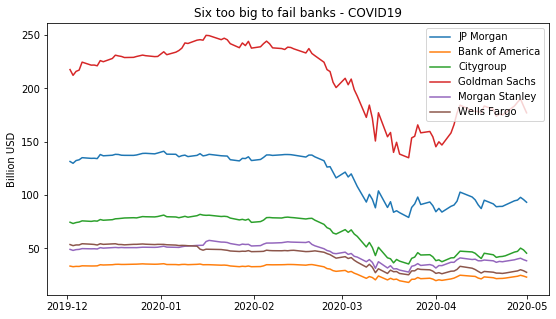

In [91]:
# Dates of the corona crisis
coronastart = "2019-12-01"
coronaend   = "2020-05-03"

# Download banks as previously
JPMcorona  = yf.download("JPM", start=coronastart, end=coronaend) # JP Morgan

BACcorona  = yf.download("BAC", start=coronastart, end=coronaend) # Bank of America

Ccorona    = yf.download("C", start=coronastart, end=coronaend)   # Citygroup

GScorona   = yf.download("GS", start=coronastart, end=coronaend)  # Goldman Sachs

MScorona   = yf.download("MS", start=coronastart, end=coronaend)  # Morgan Stanley

WFCcorona  = yf.download("WFC", start=coronastart, end=coronaend) # Wells Fargo

# Set up plot
plt.figure(num=None, figsize=(9, 5))
plt.plot(JPMcorona['Close'])
plt.plot(BACcorona['Close'])
plt.plot(Ccorona['Close'])
plt.plot(GScorona['Close'])
plt.plot(MScorona['Close'])
plt.plot(WFCcorona['Close'])
plt.title('Six too big to fail banks - COVID19')
plt.ylabel('Billion USD')
plt.legend(('JP Morgan', 'Bank of America','Citygroup', 'Goldman Sachs', 'Morgan Stanley', 'Wells Fargo'))

# Save figure
plt.savefig('webpage020.png',bbox_inches = 'tight')

# Show plot
plt.show()

## Conclusion to the state of the American Economy: 
From the relative small drop in the American Economy - and the prognosis that the value of stock is rising back to levels close to before Corona Virus, why are many experts still saying that we are in a critical state for the American Economy?

We investigated this online: 

#### The Federal Reserve
The Federal Reserve is printing money, generating more cash flow in America and thereby keeping the economy stable. 

## Winners of the outbreak
However, it has been said that some companies did not lose on the Corona Virus - on the contrary, they prospered on the pandemic. 
https://finance.yahoo.com/news/best-worst-performing-stocks-coronavirus-130801281.html


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


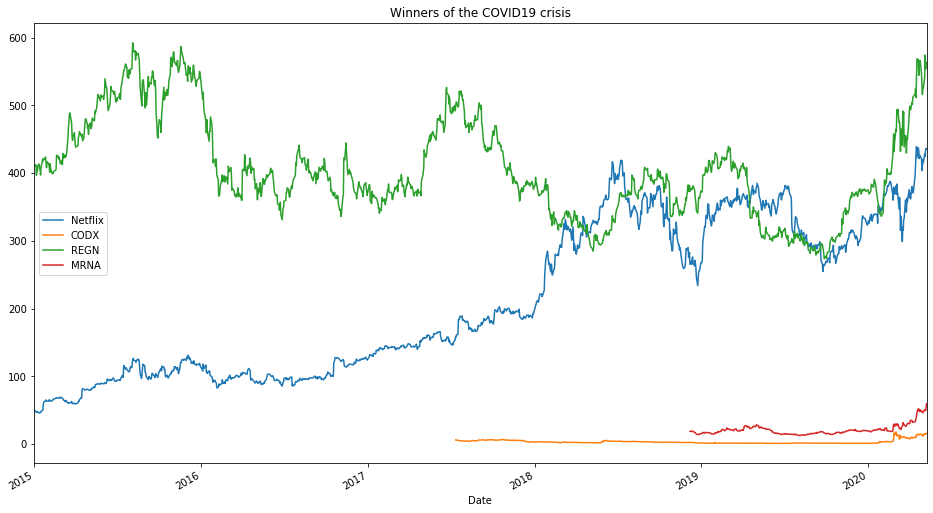

In [92]:
#Downloading the four winners according to yahoo finance, and plotting their closing prices
Netflix  = yf.download("NFLX", start="2015-01-01", end=end)
Netflix['Close'].plot(figsize=(16, 9))

CODX  = yf.download("CODX", start="2015-01-01", end=end)
CODX['Close'].plot(figsize=(16, 9))

REGN  = yf.download("REGN", start="2015-01-01", end=end)
REGN['Close'].plot(figsize=(16, 9))

MRNA  = yf.download("MRNA", start="2015-01-01", end=end)
MRNA['Close'].plot(figsize=(16, 9))

# Setting up figure
plt.legend(('Netflix', 'CODX','REGN', 'MRNA'))
plt.title('Winners of the COVID19 crisis')

# Show plot
plt.show()

The graph shows a couple of findings: 

- the companies declared winners are of very different sizes
- two of them have not been on the stock market for very long
- as written in the article, they seem to have experienced some rapid growth

If we zoom into the current period of time, specifically from 2020 and onwards, their development is a bit more clear

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


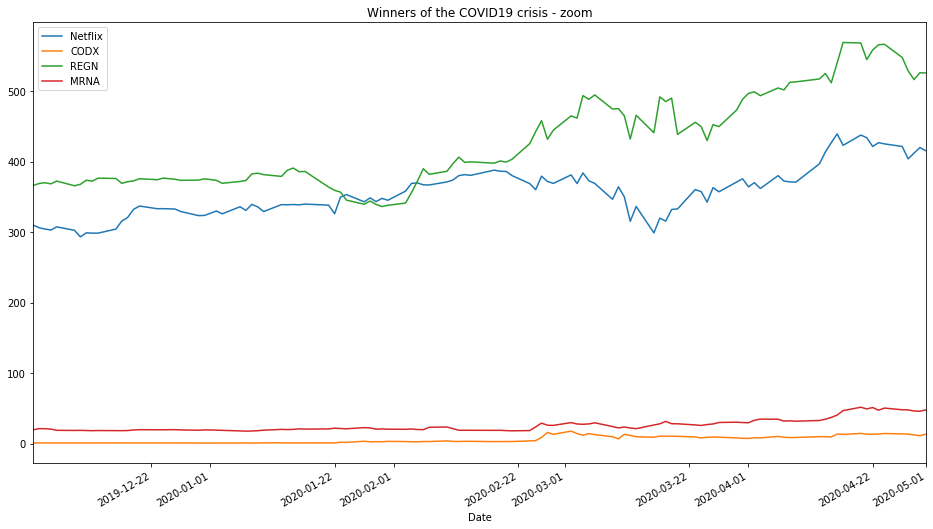

In [93]:
#Downloading the four winners according to yahoo finance, and plotting their closing prices
Netflixcorona  = yf.download("NFLX", start=coronastart, end=coronaend)
Netflixcorona['Close'].plot(figsize=(16, 9))

CODXcorona  = yf.download("CODX", start=coronastart, end=coronaend)
CODXcorona['Close'].plot(figsize=(16, 9))

REGNcorona  = yf.download("REGN", start=coronastart, end=coronaend)
REGNcorona['Close'].plot(figsize=(16, 9))

MRNAcorona  = yf.download("MRNA", start=coronastart, end=coronaend)
MRNAcorona['Close'].plot(figsize=(16, 9))

# Set up figure and plot
plt.legend(['Netflix', 'CODX','REGN', 'MRNA'])
plt.title('Winners of the COVID19 crisis - zoom')

# Show plot
plt.show()

Looking at the individual changes, their percentual growth is much more clear

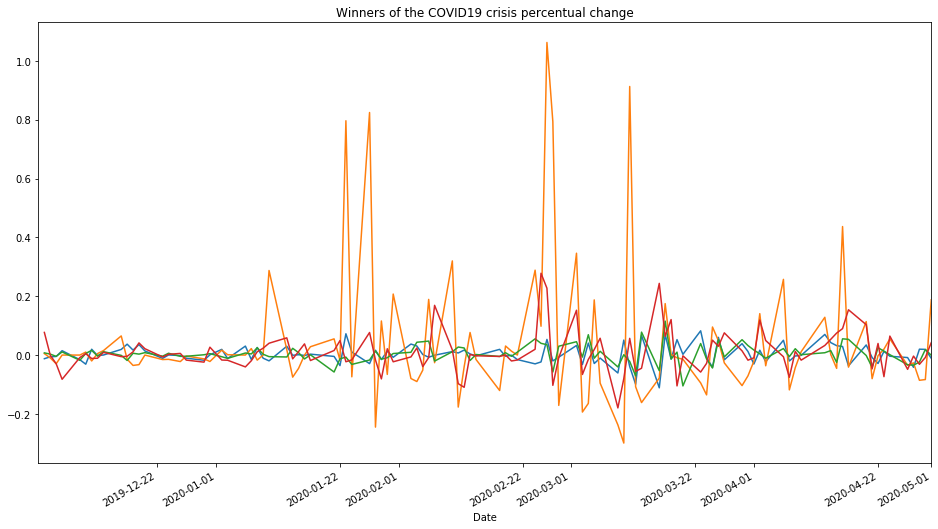

In [94]:
#Downloading the four winners according to yahoo finance, and plotting their closing prices
NetflixcoronaChange = Netflixcorona.pct_change(1)
NetflixcoronaChange['Close'].plot(figsize=(16, 9))

CODXcoronaChange = CODXcorona.pct_change(1)
CODXcoronaChange['Close'].plot(figsize=(16, 9))

REGNcoronaChange = REGNcorona.pct_change(1)
REGNcoronaChange['Close'].plot(figsize=(16, 9))

MRNAcoronaChange = MRNAcorona.pct_change(1)
MRNAcoronaChange['Close'].plot(figsize=(16, 9))

# Set up plot
plt.title("Percentual change in value from day to day")
plt.title('Winners of the COVID19 crisis percentual change')

# Show plot
plt.show()

## Jobs and poverty in America
So, if so many companies are doing incredibly well, why should the american economy be afraid? The largest companies are not losing money, and some companies are even benefitting of the crisis? 

The American economy is still under a lot of pressure - for several reasons. First and foremost, as described before, because of the blowtorch the American Government is currently helping fuel the fire - printing money in the Federal Reserve - is not a feasible solution. 

Furtherore, there is another huge player in the American Economy who relies heavily on the American Individual, and whom the American Economy is hugely dependent on: the banks.  

We have investigated how the banks have fallen in value - but there is still a major concern that the large players could crack. The reason the American Economy cracked in 2008 was because of horrible loan structures. Some of these have been removed, and they are not as easy to obtain - but the banks still have a lot of money floating in housing loans. 

The banks need the money. If the individual can't pay their loans, the house they bought will be handed over to the bank - but the bank can't use this value, and since the individual not being able to pay his loans will not buy a new house with a new loan the bank essentially has less money. 

The largest reason for people not being able to pay their loan is uneployment - and this is an area that should raise concern

In [95]:
# Read job export
jobs = pd.read_excel("Data/Jobs.xlsx")

In [96]:
# Transform dataframe
jobs = jobs.drop([0, 1,2,3,4,5,6,7,8,9])
jobs.columns = jobs.iloc[0]
jobs = jobs.drop([10])

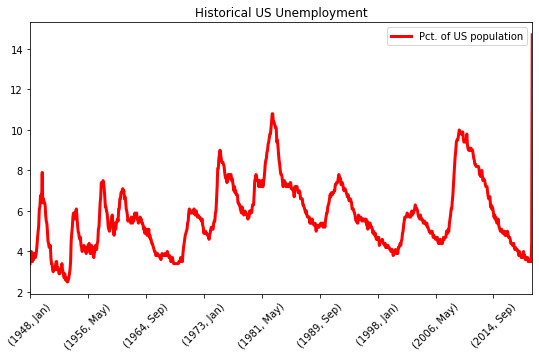

In [97]:
# Stack and transform dataset 
Unemployment = jobs.set_index('Year').stack()
Unemployment = pd.DataFrame(data=Unemployment)

# Plot values
Unemployment.plot(figsize=(9, 5),color='r',LineWidth = 3)
plt.title('Historical US Unemployment')
plt.legend(['Pct. of US population'])
plt.xticks(rotation=45)
plt.xlabel('')

# Save figure for webpage
plt.savefig('webpage021.png',bbox_inches = 'tight')

# Show plot
plt.show()

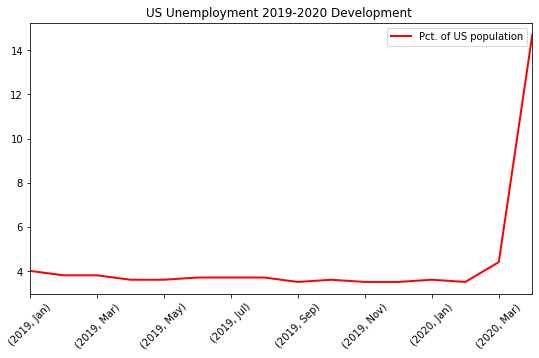

In [98]:
# Filter to values from 2019 and newer
Unemployment[Unemployment.index.get_level_values(0) >= 2019].plot(figsize=(9, 5),color='r',LineWidth = 2)

# Set up plot layout
plt.title('US Unemployment 2019-2020 Development ')
plt.legend(['Pct. of US population'])
plt.xticks(rotation=45)
plt.xlabel('')

# Save figure for website
plt.savefig('webpage022.png',bbox_inches = 'tight')

# Show plot
plt.show()

# 4) Genre
In general, we have made a magazine-style narrative due to the structure of a classic scroll-website, containing annotated maps and graphs, with a very clear horisontal linear flow. The narrative is completely driven by us as narrators.

However, some of the visuals still include levels of interactivity to allow the user to dive deeper into details and possibly find their own curriosities within the current development. We have used lots of messaging, which in some cases clutter the visuals up a bit, but in general really help convey the story we aim to tell. 

### Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
Alle references to tools are from the PDF Segel and Heer from Lecture 7, figure 7

Our visualizations were mostly of a explanatory and narrative structure, and we did therefore not use as many tools from the Visual Narrative-toolbox. We did however use a consistent visual platform, being the webpage with very similar types of plots, and feature distinction using colours to mark different graphs. 

However, our timelapse used both motion and character distinction in order to show the change in contamination over time. 


### Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?
We used a very linear structure in our website, since the audience was someone not familiar with data and we had a story to tell. This was the case for the vast majority of our visualisations. We included interactive tools were it made sense to allow the user to dive into detail, for instance with enabling hovering on heat maps and some of our bokeh charts with very distinct data points. 


We did however try to think about how to structure our story, and limit interactivity to where it made sense for the narrative of our website. In very conclusive chart, we instead utilized messaging with fixed narratives with annotations in form for arrows and captions. 


For the more complex stories, we even included explanatory articles to phenomenons, such as how the best day in Dow Jones history could happen during the pandemic or why the American Economy is so dependent on employment rates. 
Lastly, because of our website format being an explanation of the pandemic as a holistic phenomenon, we used a lot of comments and summaries after each section.

# 5) Visualizations
### Explain the visualizations you've chosen. Why are they right for the story you want to tell?

We chose different forms of visualisations for different aspects of our story. However, in general we stuck to a very fixed and author driven structure with a lot of messaging and explanatory info between sections.  

For the financial impact, we used narrative visuals to guide the reader through a complicated field, accompanied by lots of text explaining the various ideas and concepts. We had a very clear story to tell here, since the numbers of unemployment, banks, DOW Jones and companies intertwine, and without the sufficient knowledge in the different field it can be easy to make false conclusions. 

For instance, it is interesting that the Dow Jones index had its best day ever relative to change during the Corona Virus, and that the Dow Jones index is near noral. That could be a headline indicating a healthy economy in itself, so here it was important to guide the reader to the sufficient understanding of why that is the case. 
With the spread on the other hand, it is interesting to mix explanatory and exploratory. 

We have chosen heat maps to show the spread of the pandemic, since the important thing to show here was the escalation of pandemic movements. We chose this over a more detailed view such as a barchart or heatmap, because the spread was the element we wanted to convey. We implemented these as GIF’s to Another good choice could also be to focus on the growth rate, and we investigated this using barcharts. 
For movement of numbers over time, were the rate of growth was the story of interest, we used very basic line graphs. This was simply to convey the story of essence - the pattern of growth, not the numbers in specific. For those graphs were it made sense to dive deeper into details, we added interactivity mixed with messaging, such as having growth rate of spread and lockdown of major countries in the same chart. We wanted to convey the story that the growth rate started stalling only after lockdown, and by letting the reader click through different countries themselves the story would be strongly conveyed.

# 6) Discussion
### What went well?
Our process was really good, starting off by brainstorming based on both narratives we thought would be interesting as well as data we could gather online. 

We used our competencies really well, and ended up with a lot of different plots and conclusions because of our different backgrounds. 

We also started working really early in the process, so we had time to focus on details, narrowing down and changing a bit of direction following feedback to streamline our narrative more towards the economy. 



### What is still missing? What could be improved?
We have chosen a few points to focus on regarding improvements and things we did not get a chance to look at, distributed on different aspects of development:

#### Anomalities in the data we did not have time to dive into
We found some small anomalities along the way, which we unfortunately did not have time to dive into. For instance, New York seemed relatively quiet on Twitter compared to the massive impace the Virus has had on stores and deathtoll. The dataset from Kaggle was the highest quality we could find, but for instance scraping twitter using a developer account would have given us full access and would be interesting another time. 

#### More time to see the change in virus 
The pandemic was still evolving as we were working with it, and many interesting events are right around the corner. Flattening of curves, different ways of reopening countries, and new epi centers. Also, the American economy has only just started reacting to the unemployment numbers, tactics used by the federal reserve and the growing casulties. 

We had plenty of data and angles to work at - but a more full picture of the whole pandemic would allow us to make better conclusions on what worked and what didn't. 

Hopefully we can use data science in a more rapid way in the future to help uncover which tactics are the right, and enlighten those making the tough holistic decisions on potential impacts of options.  

#### Commodities
Another interesting aspect to look into is the change of commodity, perishable and non-perishable and how their prices fluctuated because of the changes in demand. For instance, Crude Oil has experienced heavy contango because of the restriction in flights the next period of time, and that could be imagined to be the same for other commodities with future contracts. 

We did not have access to other commoditiy-prices, and because of the timeframe of the assignment we chose to focus on a strict narrative on stocks, individual employment and banks. But in a larger scope, this would have been one of the first areas of focus in the economic-area, alongside the distribution of unemployed, regarding characteristicas as gender, race, age, geography and occupation. 

#### More dynamic website
We used GitHub pages with iFrame embedding of precompiled visuals from our notebook in HTML so show our graphs, and iFrame for PNG's as well. The benefit here was ease of use, but we compromised heavily on customizability. The graphics do not fit well with changes of screendefaults, and we would love to have a wider format to work with, as well as having scaleable elements. 

This would have worked if the HTML was easily editable from the markdown-editor in github pages, instead of being bound on the simple README editor (which works great for what it is). But we would love to have spent more time on getting this freedom.

# 7) Contributions
### You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).
We started out together and drafted ideas for what could be interesting to explore in depth. We quickly found out that we wanted to understand the Corona Virus as a holistic event - how did it hit the world, both physically. 
We spent some days finding angles and datasets to support our ideas, especially before hand in of assignent A which laid the ground work for where we wanted to go witht the time we had. 


From there, Kasper was mainly in charge of Twitter and Spread, and Rasmus was mainly in charge of Financial Impact. We checked in with one another to share findings and ideas, but took lead on those parts respectively.


We then helped write the narrative of the webpage together and gather the individual parts. 

